<a href="https://colab.research.google.com/github/himanshu63867/Machine-Learning-Projects/blob/main/Credit%20Card%20Fraud%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Intuitions**

# **What is Credit Card Fraud?**
Credit card fraud is when someone uses another person's credit card or account information to make unauthorized purchases or access funds through cash advances. Credit card fraud doesn’t just happen online; it happens in brick-and-mortar stores, too. As a business owner, you can avoid serious headaches – and unwanted publicity – by recognizing potentially fraudulent use of credit cards in your payment environment.

# **Three challenges surrounding credit card fraud**
It's not always easy to agree on ground truth for what "fraud" means.

Regardless of how you define ground truth, the vast majority of charges are not fraudulent.

Most merchants aren't experts at evaluating the business impact of fraud.





# **Problem Statement:**

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

# **Observations**

Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.

The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.

The ‘Time’ and ‘Amount’ features are not transformed data.
There is no missing value in the dataset.

# **Why does class imbalanced affect model performance?**

In general, we want to maximize the recall while capping FPR (False Positive Rate), but you can classify a lot of charges wrong and still maintain a low FPR because you have a large number of true negatives.


This is conducive to picking a relatively low threshold, which results in the high recall but extremely low precision.

# **Business questions to brainstorm:**

Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount

How different is the amount of money used in different transaction classes?

Do fraudulent transactions occur more often during a certain frames?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [20]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


# **Exploratory Data Analysis**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103088 entries, 0 to 103087
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    103088 non-null  int64  
 1   V1      103088 non-null  float64
 2   V2      103088 non-null  float64
 3   V3      103088 non-null  float64
 4   V4      103088 non-null  float64
 5   V5      103088 non-null  float64
 6   V6      103088 non-null  float64
 7   V7      103088 non-null  float64
 8   V8      103088 non-null  float64
 9   V9      103088 non-null  float64
 10  V10     103088 non-null  float64
 11  V11     103088 non-null  float64
 12  V12     103088 non-null  float64
 13  V13     103088 non-null  float64
 14  V14     103088 non-null  float64
 15  V15     103088 non-null  float64
 16  V16     103088 non-null  float64
 17  V17     103088 non-null  float64
 18  V18     103088 non-null  float64
 19  V19     103088 non-null  float64
 20  V20     103088 non-null  float64
 21  V21     10

In [22]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,103088.00,103088.00,103088.00,103088.00,103088.00,103088.00,103088.00,103088.00,103088.00,103088.00,...,103088.00,103088.00,103088.00,103088.00,103087.00,103087.00,103087.00,103087.00,103087.00,103087.00
mean,43195.78,-0.26,-0.03,0.68,0.16,-0.28,0.10,-0.12,0.06,-0.05,...,-0.03,-0.10,-0.04,0.01,0.13,0.03,0.00,0.00,97.04,0.00
std,17339.55,1.85,1.65,1.32,1.35,1.36,1.30,1.22,1.24,1.12,...,0.75,0.64,0.63,0.60,0.44,0.49,0.39,0.32,263.29,0.05
min,0.00,-56.41,-72.72,-33.68,-5.17,-42.15,-26.16,-31.76,-73.22,-9.28,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.53,-9.39,-9.62,0.00,0.00
25%,33760.00,-1.03,-0.60,0.18,-0.72,-0.91,-0.64,-0.61,-0.14,-0.69,...,-0.22,-0.53,-0.18,-0.32,-0.13,-0.32,-0.06,-0.01,7.17,0.00
50%,45003.00,-0.26,0.08,0.76,0.18,-0.32,-0.15,-0.07,0.08,-0.12,...,-0.06,-0.08,-0.05,0.07,0.17,-0.07,0.01,0.02,25.69,0.00
75%,56992.50,1.15,0.73,1.39,1.03,0.25,0.49,0.41,0.37,0.56,...,0.12,0.32,0.08,0.41,0.42,0.30,0.08,0.08,88.00,0.00
max,68489.00,1.96,18.90,4.23,16.72,34.80,22.53,36.68,20.01,10.39,...,27.20,10.50,19.00,4.01,5.54,3.52,12.15,33.85,19656.53,1.00


In [23]:
data.isnull().sum().sum() # checking missing value

np.int64(6)

In [24]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

/tmp/ipython-input-807841329.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


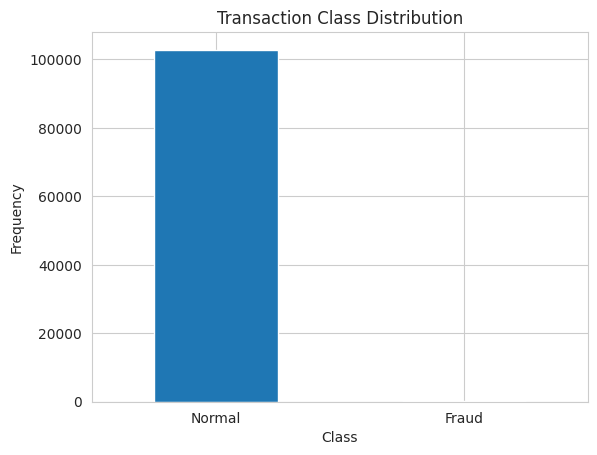

In [25]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [26]:
data.Class.value_counts()

,count
Class,
0.00,102855
1.00,232


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!


Determine the number of fraud and valid transactions in the entire dataset.

In [27]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (232, 31)
Shape of Non-Fraudulant transactions: (102855, 31)


How different are the amount of money used in different transaction classes?

In [28]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,232.00,102855.00
mean,115.52,97.00
std,253.72,263.31
min,0.00,0.00
25%,1.00,7.20
50%,7.60,25.74
75%,99.99,87.90
max,1809.68,19656.53


Do fraudulent transactions occur more often during certain time frame ?

In [29]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,232.00,102855.00
mean,37898.66,43207.49
std,18401.87,17335.25
min,406.00,0.00
25%,25222.75,33771.00
50%,41175.50,45016.00
75%,53502.75,57000.00
max,68357.00,68488.00


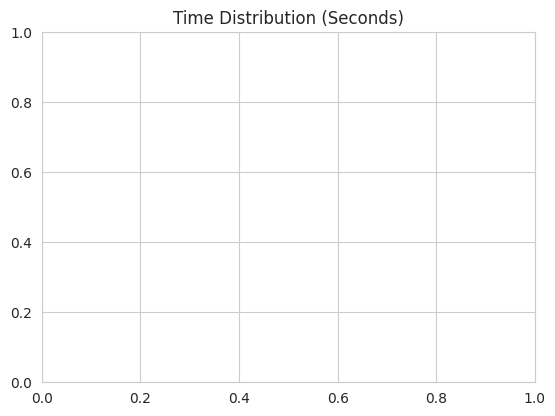

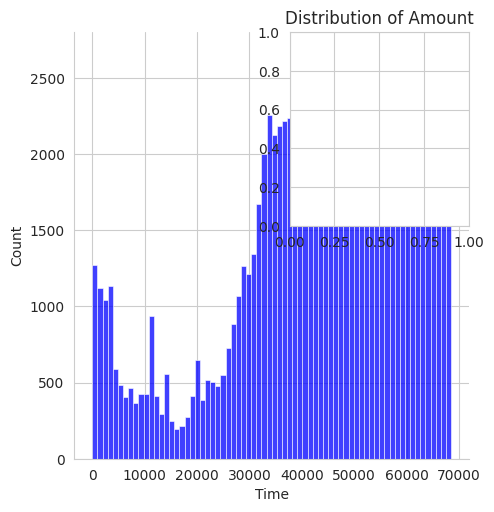

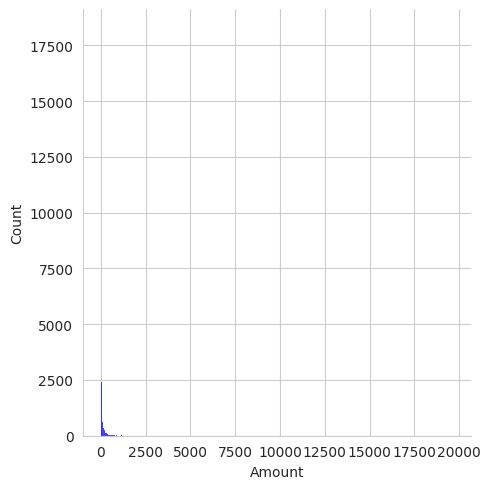

In [30]:

# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.displot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(data['Amount'],color='blue');

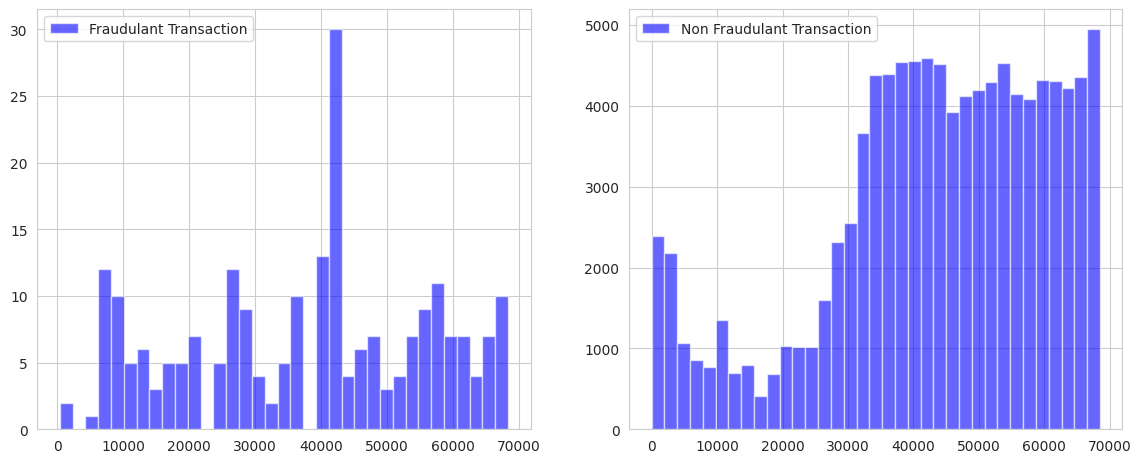

In [31]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

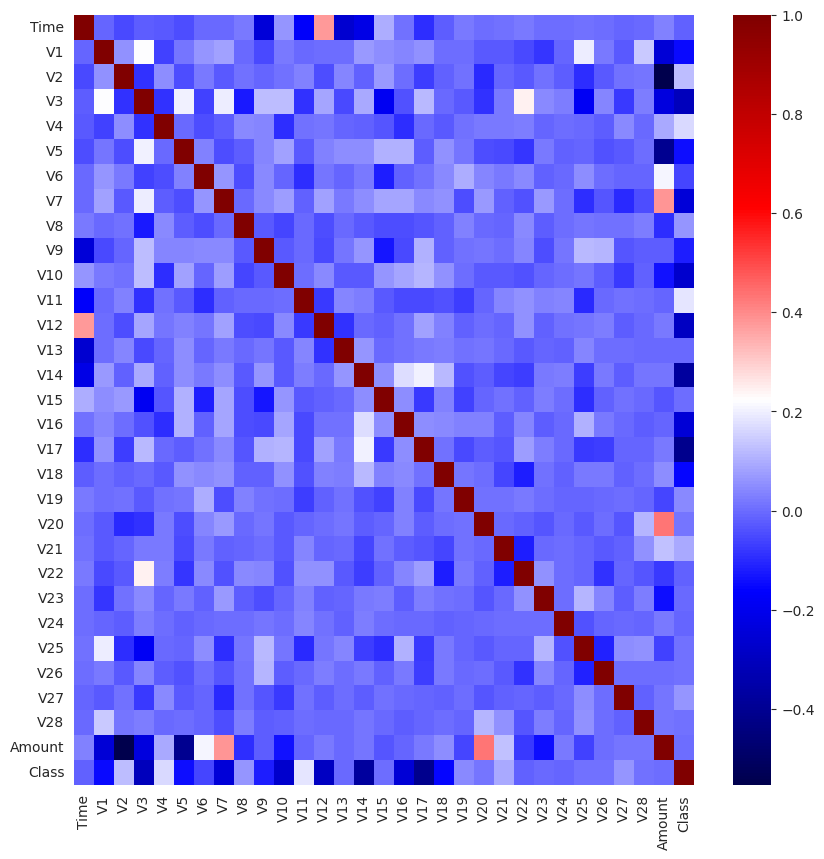

In [32]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

# **Highest correlations come from:**

- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

While these correlations are high, I don't expect it to run the risk of multicollinearity.

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

# **Data Pre-processing**

Time and Amount should be scaled as the other columns.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0022692627494456763
Non-Fraudulant transaction weight: 0.9977307372505543


In [34]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (57728, 30), y_train: (57728,)
_______________________________________________________
VALIDATION: X_validate: (14433, 30), y_validate: (14433,)
__________________________________________________
TESTING: X_test: (30927, 30), y_test: (30927,)


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")


# **Model Building**

# Artificial Neural Network (ANNs)

In [36]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,849 (558.00 KB)

 Trainable params: 141,313 (552.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [37]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train,
    validation_data=(X_validate, y_validate),
    batch_size=2048,
    epochs=300,
#     class_weight=class_weight,
    callbacks=callbacks,
)


Epoch 1/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - fn: 35.7500 - fp: 14624.5713 - loss: 0.9090 - precision: 0.0017 - recall: 0.3745 - tn: 15004.3213 - tp: 31.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - fn: 37.3667 - fp: 15506.5332 - loss: 0.9066 - precision: 0.0018 - recall: 0.3856 - tn: 15986.9004 - tp: 34.0000 - val_fn: 4.0000 - val_fp: 3329.0000 - val_loss: 0.6589 - val_precision: 0.0066 - val_recall: 0.8462 - val_tn: 11078.0000 - val_tp: 22.0000
Epoch 2/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - fn: 13.0714 - fp: 13628.5713 - loss: 0.8073 - precision: 0.0043 - recall: 0.7857 - tn: 15995.3213 - tp: 59.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - fn: 13.4667 - fp: 14463.4668 - loss: 0.8064 - precision: 0.0043 - recall: 0.7903 - tn: 17025.3008 - tp: 62.5667 - val_fn: 4.0000 - val_fp: 1245.0000 - val_loss: 0.6246 - val_precision: 0.0174 - val_recall: 0.8462 - val_tn: 13162.0000 - val_tp: 22.0000
Epoch 3/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 7.4643 - fp: 12666.4287 - loss: 0.7489 - precision: 0.0046 - recall: 0.8678 - tn: 16963.1426 - tp: 58.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - fn: 7.7667 - fp: 13452.4004 - loss: 0.7486 - precision: 0.0046 - recall: 0.8705 - tn: 18041.6660 - tp: 62.9667 - val_fn: 4.0000 - val_fp: 1226.0000 - val_loss: 0.6081 - val_precision: 0.0176 - val_recall: 0.8462 - val_tn: 13181.0000 - val_tp: 22.0000
Epoch 4/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 8.2857 - fp: 11894.5713 - loss: 0.7157 - precision: 0.0052 - recall: 0.8640 - tn: 17730.8926 - tp: 62.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 8.6667 - fp: 12621.1338 - loss: 0.7152 - precision: 0.0052 - recall: 0.8659 - tn: 18869.0996 - tp: 65.9000 - val_fn: 4.0000 - val_fp: 584.0000 - val_loss: 0.5828 - val_precision: 0.0363 - val_recall: 0.8462 - val_tn: 13823.0000 - val_tp: 22.0000
Epoch 5/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 6.6071 - fp: 10863.2500 - loss: 0.6761 - precision: 0.0062 - recall: 0.9331 - tn: 18758.8926 - tp: 67.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 7.2333 - fp: 11528.2334 - loss: 0.6758 - precision: 0.0061 - recall: 0.9294 - tn: 19958.9004 - tp: 70.4333 - val_fn: 4.0000 - val_fp: 445.0000 - val_loss: 0.5634 - val_precision: 0.0471 - val_recall: 0.8462 - val_tn: 13962.0000 - val_tp: 22.0000
Epoch 6/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - fn: 7.5000 - fp: 10192.5713 - loss: 0.6569 - precision: 0.0050 - recall: 0.8874 - tn: 19443.2500 - tp: 52.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - fn: 8.0667 - fp: 10806.7334 - loss: 0.6561 - precision: 0.0051 - recall: 0.8868 - tn: 20693.1660 - tp: 56.8333 - val_fn: 4.0000 - val_fp: 83.0000 - val_loss: 0.5246 - val_precision: 0.2095 - val_recall: 0.8462 - val_tn: 14324.0000 - val_tp: 22.0000
Epoch 7/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - fn: 5.1429 - fp: 9052.5713 - loss: 0.6218 - precision: 0.0064 - recall: 0.9319 - tn: 20577.2852 - tp: 61.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - fn: 5.6000 - fp: 9597.3330 - loss: 0.6212 - precision: 0.0064 - recall: 0.9304 - tn: 21897.0000 - tp: 64.8667 - val_fn: 4.0000 - val_fp: 63.0000 - val_loss: 0.5066 - val_precision: 0.2588 - val_recall: 0.8462 - val_tn: 14344.0000 - val_tp: 22.0000
Epoch 8/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - fn: 5.1786 - fp: 8153.9287 - loss: 0.5894 - precision: 0.0074 - recall: 0.9169 - tn: 21475.3574 - tp: 61.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - fn: 5.5000 - fp: 8640.6670 - loss: 0.5892 - precision: 0.0074 - recall: 0.9174 - tn: 22853.1328 - tp: 65.5000 - val_fn: 4.0000 - val_fp: 36.0000 - val_loss: 0.4813 - val_precision: 0.3793 - val_recall: 0.8462 - val_tn: 14371.0000 - val_tp: 22.0000
Epoch 9/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - fn: 4.8214 - fp: 7211.7144 - loss: 0.5661 - precision: 0.0090 - recall: 0.9192 - tn: 22414.0352 - tp: 65.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 5.1000 - fp: 7646.7998 - loss: 0.5659 - precision: 0.0089 - recall: 0.9200 - tn: 23843.6992 - tp: 69.2000 - val_fn: 4.0000 - val_fp: 22.0000 - val_loss: 0.4561 - val_precision: 0.5000 - val_recall: 0.8462 - val_tn: 14385.0000 - val_tp: 22.0000
Epoch 10/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - fn: 8.0714 - fp: 6420.7144 - loss: 0.5455 - precision: 0.0085 - recall: 0.8751 - tn: 23209.8926 - tp: 57.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - fn: 8.6000 - fp: 6805.3999 - loss: 0.5450 - precision: 0.0086 - recall: 0.8753 - tn: 24689.6328 - tp: 61.1667 - val_fn: 4.0000 - val_fp: 16.0000 - val_loss: 0.4371 - val_precision: 0.5789 - val_recall: 0.8462 - val_tn: 14391.0000 - val_tp: 22.0000
Epoch 11/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - fn: 6.6429 - fp: 5419.6787 - loss: 0.5120 - precision: 0.0115 - recall: 0.9062 - tn: 24207.5352 - tp: 62.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - fn: 7.0667 - fp: 5745.8999 - loss: 0.5117 - precision: 0.0115 - recall: 0.9059 - tn: 25745.9668 - tp: 65.8667 - val_fn: 4.0000 - val_fp: 12.0000 - val_loss: 0.4080 - val_precision: 0.6471 - val_recall: 0.8462 - val_tn: 14395.0000 - val_tp: 22.0000
Epoch 12/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - fn: 7.1786 - fp: 4789.1069 - loss: 0.4962 - precision: 0.0114 - recall: 0.8817 - tn: 24844.3926 - tp: 55.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - fn: 7.6333 - fp: 5074.5000 - loss: 0.4958 - precision: 0.0115 - recall: 0.8825 - tn: 26423.2324 - tp: 59.4333 - val_fn: 4.0000 - val_fp: 11.0000 - val_loss: 0.3921 - val_precision: 0.6667 - val_recall: 0.8462 - val_tn: 14396.0000 - val_tp: 22.0000
Epoch 13/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 4.7857 - fp: 3842.3215 - loss: 0.4665 - precision: 0.0160 - recall: 0.9317 - tn: 25786.5723 - tp: 62.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - fn: 5.2667 - fp: 4079.2334 - loss: 0.4663 - precision: 0.0160 - recall: 0.9301 - tn: 27414.1992 - tp: 66.1000 - val_fn: 4.0000 - val_fp: 10.0000 - val_loss: 0.3721 - val_precision: 0.6875 - val_recall: 0.8462 - val_tn: 14397.0000 - val_tp: 22.0000
Epoch 14/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 7.2500 - fp: 3306.6785 - loss: 0.4474 - precision: 0.0164 - recall: 0.8868 - tn: 26323.5723 - tp: 58.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - fn: 7.6333 - fp: 3505.3000 - loss: 0.4471 - precision: 0.0166 - recall: 0.8877 - tn: 27989.4004 - tp: 62.4667 - val_fn: 4.0000 - val_fp: 8.0000 - val_loss: 0.3560 - val_precision: 0.7333 - val_recall: 0.8462 - val_tn: 14399.0000 - val_tp: 22.0000
Epoch 15/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - fn: 6.5000 - fp: 2853.9285 - loss: 0.4283 - precision: 0.0218 - recall: 0.9144 - tn: 26774.3223 - tp: 61.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - fn: 7.0667 - fp: 3016.5334 - loss: 0.4278 - precision: 0.0217 - recall: 0.9125 - tn: 28476.3008 - tp: 64.9000 - val_fn: 4.0000 - val_fp: 7.0000 - val_loss: 0.3362 - val_precision: 0.7586 - val_recall: 0.8462 - val_tn: 14400.0000 - val_tp: 22.0000
Epoch 16/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - fn: 7.9643 - fp: 2309.8572 - loss: 0.4014 - precision: 0.0263 - recall: 0.8766 - tn: 27317.0352 - tp: 61.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - fn: 8.4333 - fp: 2445.3999 - loss: 0.4011 - precision: 0.0263 - recall: 0.8772 - tn: 29046.1660 - tp: 64.8000 - val_fn: 4.0000 - val_fp: 8.0000 - val_loss: 0.3124 - val_precision: 0.7333 - val_recall: 0.8462 - val_tn: 14399.0000 - val_tp: 22.0000
Epoch 17/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 7.5357 - fp: 1998.9642 - loss: 0.3818 - precision: 0.0258 - recall: 0.8844 - tn: 27633.6426 - tp: 55.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - fn: 8.0333 - fp: 2108.7666 - loss: 0.3815 - precision: 0.0262 - recall: 0.8845 - tn: 29388.1328 - tp: 59.8667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.3112 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 18/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 8.7857 - fp: 1526.0714 - loss: 0.3590 - precision: 0.0387 - recall: 0.8772 - tn: 28102.7148 - tp: 58.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 9.2667 - fp: 1617.7333 - loss: 0.3588 - precision: 0.0386 - recall: 0.8772 - tn: 29875.5996 - tp: 62.2000 - val_fn: 4.0000 - val_fp: 6.0000 - val_loss: 0.2885 - val_precision: 0.7857 - val_recall: 0.8462 - val_tn: 14401.0000 - val_tp: 22.0000
Epoch 19/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 9.2500 - fp: 1205.2500 - loss: 0.3385 - precision: 0.0462 - recall: 0.8684 - tn: 28420.9277 - tp: 60.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - fn: 9.7667 - fp: 1279.6333 - loss: 0.3382 - precision: 0.0463 - recall: 0.8685 - tn: 30211.2676 - tp: 64.1333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.2744 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 20/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - fn: 8.8571 - fp: 920.5357 - loss: 0.3154 - precision: 0.0591 - recall: 0.8880 - tn: 28709.2148 - tp: 57.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - fn: 9.7333 - fp: 973.1667 - loss: 0.3152 - precision: 0.0592 - recall: 0.8843 - tn: 30521.0664 - tp: 60.8333 - val_fn: 4.0000 - val_fp: 7.0000 - val_loss: 0.2491 - val_precision: 0.7586 - val_recall: 0.8462 - val_tn: 14400.0000 - val_tp: 22.0000
Epoch 21/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - fn: 11.2143 - fp: 893.7143 - loss: 0.3012 - precision: 0.0573 - recall: 0.8318 - tn: 28737.5352 - tp: 53.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - fn: 12.0000 - fp: 944.0000 - loss: 0.3009 - precision: 0.0576 - recall: 0.8313 - tn: 30551.6328 - tp: 57.1667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.2428 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 22/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 13.1429 - fp: 683.4643 - loss: 0.2818 - precision: 0.0660 - recall: 0.7570 - tn: 28946.1777 - tp: 53.2143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 13.8667 - fp: 721.1667 - loss: 0.2814 - precision: 0.0669 - recall: 0.7609 - tn: 30772.9668 - tp: 56.8000 - val_fn: 4.0000 - val_fp: 6.0000 - val_loss: 0.2205 - val_precision: 0.7857 - val_recall: 0.8462 - val_tn: 14401.0000 - val_tp: 22.0000
Epoch 23/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 14.8929 - fp: 571.3214 - loss: 0.2617 - precision: 0.0954 - recall: 0.7928 - tn: 29055.9648 - tp: 53.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - fn: 15.7667 - fp: 606.5667 - loss: 0.2616 - precision: 0.0948 - recall: 0.7923 - tn: 30885.3672 - tp: 57.1000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.2113 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 24/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 9.6786 - fp: 425.4643 - loss: 0.2387 - precision: 0.1227 - recall: 0.8605 - tn: 29203.9277 - tp: 56.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 10.6333 - fp: 454.3000 - loss: 0.2387 - precision: 0.1219 - recall: 0.8576 - tn: 31039.5996 - tp: 60.2667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1948 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 25/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - fn: 15.7500 - fp: 364.3571 - loss: 0.2311 - precision: 0.1313 - recall: 0.8014 - tn: 29260.6426 - tp: 55.2500 

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - fn: 16.5667 - fp: 387.0000 - loss: 0.2307 - precision: 0.1311 - recall: 0.8004 - tn: 31102.8008 - tp: 58.4333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1809 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 26/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - fn: 21.9643 - fp: 294.4286 - loss: 0.2133 - precision: 0.1603 - recall: 0.7072 - tn: 29328.3574 - tp: 51.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - fn: 22.9667 - fp: 314.3333 - loss: 0.2132 - precision: 0.1587 - recall: 0.7078 - tn: 31173.4004 - tp: 54.1000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1727 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 27/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 15.0714 - fp: 250.1071 - loss: 0.1988 - precision: 0.1553 - recall: 0.7597 - tn: 29380.6426 - tp: 50.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 16.2000 - fp: 267.3667 - loss: 0.1985 - precision: 0.1558 - recall: 0.7595 - tn: 31227.8008 - tp: 53.4333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1567 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 28/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 15.3929 - fp: 207.6786 - loss: 0.1844 - precision: 0.2194 - recall: 0.7938 - tn: 29418.8574 - tp: 54.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 16.5667 - fp: 222.7667 - loss: 0.1844 - precision: 0.2171 - recall: 0.7907 - tn: 31268.4668 - tp: 57.0000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1478 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 29/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 18.7857 - fp: 178.0000 - loss: 0.1735 - precision: 0.2255 - recall: 0.7190 - tn: 29446.8574 - tp: 52.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - fn: 19.6000 - fp: 191.0000 - loss: 0.1735 - precision: 0.2246 - recall: 0.7219 - tn: 31298.6660 - tp: 55.5333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1392 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 30/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - fn: 14.6071 - fp: 149.7857 - loss: 0.1659 - precision: 0.2772 - recall: 0.8279 - tn: 29477.5723 - tp: 54.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - fn: 15.9667 - fp: 159.4667 - loss: 0.1656 - precision: 0.2751 - recall: 0.8216 - tn: 31332.5332 - tp: 56.8333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1321 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 31/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - fn: 16.5357 - fp: 148.4643 - loss: 0.1534 - precision: 0.2573 - recall: 0.7879 - tn: 29479.3926 - tp: 51.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - fn: 17.7000 - fp: 158.3000 - loss: 0.1533 - precision: 0.2566 - recall: 0.7847 - tn: 31334.1660 - tp: 54.6333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1226 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 32/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 23.5357 - fp: 144.2500 - loss: 0.1495 - precision: 0.2302 - recall: 0.6315 - tn: 29483.6074 - tp: 44.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 25.1000 - fp: 153.1667 - loss: 0.1494 - precision: 0.2304 - recall: 0.6321 - tn: 31339.3008 - tp: 47.2333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1166 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 33/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 15.6786 - fp: 128.2857 - loss: 0.1387 - precision: 0.3012 - recall: 0.7766 - tn: 29499.5352 - tp: 52.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 16.7000 - fp: 135.6667 - loss: 0.1386 - precision: 0.3008 - recall: 0.7758 - tn: 31356.7676 - tp: 55.6667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.1082 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 34/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 18.0000 - fp: 131.5000 - loss: 0.1357 - precision: 0.2555 - recall: 0.7149 - tn: 29496.1777 - tp: 50.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 19.0667 - fp: 138.6667 - loss: 0.1354 - precision: 0.2577 - recall: 0.7166 - tn: 31353.6328 - tp: 53.4333 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.1026 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 35/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - fn: 17.3929 - fp: 96.2500 - loss: 0.1221 - precision: 0.3847 - recall: 0.7561 - tn: 29528.5352 - tp: 53.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - fn: 18.8333 - fp: 103.9667 - loss: 0.1222 - precision: 0.3793 - recall: 0.7525 - tn: 31385.6328 - tp: 56.3667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0957 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 36/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 18.5000 - fp: 84.7500 - loss: 0.1183 - precision: 0.2792 - recall: 0.7132 - tn: 29554.7148 - tp: 38.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - fn: 20.3333 - fp: 89.9667 - loss: 0.1182 - precision: 0.2834 - recall: 0.7089 - tn: 31413.3340 - tp: 41.1667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0895 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 37/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 22.3214 - fp: 102.1071 - loss: 0.1107 - precision: 0.3074 - recall: 0.6538 - tn: 29529.1777 - tp: 42.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 24.0333 - fp: 108.2333 - loss: 0.1107 - precision: 0.3069 - recall: 0.6525 - tn: 31387.4336 - tp: 45.1000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0852 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 38/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 19.3214 - fp: 88.8214 - loss: 0.1018 - precision: 0.3257 - recall: 0.6898 - tn: 29542.3223 - tp: 45.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 20.7000 - fp: 95.1000 - loss: 0.1022 - precision: 0.3261 - recall: 0.6901 - tn: 31400.4336 - tp: 48.5667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0809 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 39/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 22.8571 - fp: 87.6429 - loss: 0.0982 - precision: 0.3319 - recall: 0.6390 - tn: 29542.0352 - tp: 43.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - fn: 24.2000 - fp: 93.6667 - loss: 0.0982 - precision: 0.3319 - recall: 0.6412 - tn: 31400.5000 - tp: 46.4333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0762 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 40/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - fn: 22.1429 - fp: 60.1071 - loss: 0.0962 - precision: 0.4069 - recall: 0.6804 - tn: 29572.2148 - tp: 41.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - fn: 23.8667 - fp: 63.8333 - loss: 0.0960 - precision: 0.4075 - recall: 0.6773 - tn: 31432.8008 - tp: 44.3000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0715 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 41/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 20.7857 - fp: 82.7500 - loss: 0.0918 - precision: 0.3302 - recall: 0.6450 - tn: 29551.0000 - tp: 41.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 22.4667 - fp: 86.4333 - loss: 0.0917 - precision: 0.3336 - recall: 0.6453 - tn: 31411.5332 - tp: 44.3667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0675 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 42/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 27.4286 - fp: 66.4286 - loss: 0.0864 - precision: 0.4034 - recall: 0.6265 - tn: 29560.4648 - tp: 41.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 29.0000 - fp: 70.9333 - loss: 0.0865 - precision: 0.4015 - recall: 0.6254 - tn: 31420.6328 - tp: 44.2333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0638 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 43/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 19.1786 - fp: 58.0357 - loss: 0.0811 - precision: 0.4786 - recall: 0.7525 - tn: 29566.7852 - tp: 52.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 20.5000 - fp: 62.3000 - loss: 0.0811 - precision: 0.4754 - recall: 0.7492 - tn: 31427.3340 - tp: 54.6667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0611 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 44/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 23.4286 - fp: 45.3571 - loss: 0.0764 - precision: 0.5363 - recall: 0.6790 - tn: 29579.1426 - tp: 48.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - fn: 24.8667 - fp: 48.9333 - loss: 0.0764 - precision: 0.5315 - recall: 0.6775 - tn: 31440.4004 - tp: 50.6000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0584 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 45/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - fn: 22.6071 - fp: 59.9643 - loss: 0.0781 - precision: 0.4397 - recall: 0.6644 - tn: 29569.7500 - tp: 43.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - fn: 24.1667 - fp: 63.5000 - loss: 0.0781 - precision: 0.4390 - recall: 0.6634 - tn: 31430.6992 - tp: 46.4333 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0553 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 46/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 21.8571 - fp: 55.6786 - loss: 0.0710 - precision: 0.4989 - recall: 0.6728 - tn: 29575.0000 - tp: 43.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 23.2667 - fp: 60.0333 - loss: 0.0711 - precision: 0.4938 - recall: 0.6727 - tn: 31435.0664 - tp: 46.4333 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0527 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 47/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 21.6429 - fp: 38.0000 - loss: 0.0622 - precision: 0.5593 - recall: 0.6636 - tn: 29593.1777 - tp: 43.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 23.0667 - fp: 41.1333 - loss: 0.0624 - precision: 0.5560 - recall: 0.6641 - tn: 31454.4336 - tp: 46.1667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0510 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 48/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 25.7143 - fp: 42.7500 - loss: 0.0661 - precision: 0.5486 - recall: 0.6515 - tn: 29578.3574 - tp: 49.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 26.9333 - fp: 46.1000 - loss: 0.0660 - precision: 0.5443 - recall: 0.6523 - tn: 31440.0664 - tp: 51.7000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0483 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 49/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 21.0357 - fp: 43.8929 - loss: 0.0632 - precision: 0.5295 - recall: 0.6567 - tn: 29582.2500 - tp: 48.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 22.3667 - fp: 45.9667 - loss: 0.0632 - precision: 0.5305 - recall: 0.6588 - tn: 31444.9004 - tp: 51.5667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0454 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 50/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - fn: 22.8929 - fp: 40.0000 - loss: 0.0621 - precision: 0.5061 - recall: 0.6631 - tn: 29590.1426 - tp: 42.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - fn: 24.3000 - fp: 42.9333 - loss: 0.0619 - precision: 0.5062 - recall: 0.6632 - tn: 31451.6660 - tp: 45.9000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0444 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 51/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 28.0714 - fp: 37.6786 - loss: 0.0610 - precision: 0.4845 - recall: 0.5432 - tn: 29589.1426 - tp: 41.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - fn: 29.5333 - fp: 40.9000 - loss: 0.0608 - precision: 0.4846 - recall: 0.5482 - tn: 31450.5996 - tp: 43.7667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0428 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 52/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 25.0714 - fp: 34.6071 - loss: 0.0550 - precision: 0.5496 - recall: 0.6570 - tn: 29589.8574 - tp: 46.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 26.3333 - fp: 37.0333 - loss: 0.0551 - precision: 0.5496 - recall: 0.6574 - tn: 31452.2676 - tp: 49.1667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0412 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 53/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 20.7143 - fp: 27.8571 - loss: 0.0588 - precision: 0.6235 - recall: 0.7218 - tn: 29600.6074 - tp: 46.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 22.3333 - fp: 30.0000 - loss: 0.0586 - precision: 0.6212 - recall: 0.7174 - tn: 31463.0332 - tp: 49.4333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0382 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 54/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - fn: 19.5357 - fp: 43.3929 - loss: 0.0516 - precision: 0.5366 - recall: 0.7008 - tn: 29584.7148 - tp: 48.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - fn: 20.7667 - fp: 46.8333 - loss: 0.0516 - precision: 0.5338 - recall: 0.7014 - tn: 31445.8672 - tp: 51.3333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0366 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 55/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 23.4643 - fp: 42.7143 - loss: 0.0506 - precision: 0.4809 - recall: 0.6452 - tn: 29589.2500 - tp: 40.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - fn: 24.7667 - fp: 44.7333 - loss: 0.0506 - precision: 0.4853 - recall: 0.6470 - tn: 31451.5664 - tp: 43.7333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0365 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 56/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 23.3214 - fp: 36.3214 - loss: 0.0529 - precision: 0.5874 - recall: 0.6375 - tn: 29590.4648 - tp: 45.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - fn: 24.6333 - fp: 39.0333 - loss: 0.0529 - precision: 0.5838 - recall: 0.6398 - tn: 31452.4336 - tp: 48.7000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0351 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 57/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 22.0714 - fp: 38.1071 - loss: 0.0499 - precision: 0.5863 - recall: 0.6801 - tn: 29589.3574 - tp: 46.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 23.5333 - fp: 40.4333 - loss: 0.0499 - precision: 0.5835 - recall: 0.6790 - tn: 31451.6660 - tp: 49.1667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0341 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 58/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - fn: 21.9643 - fp: 27.1429 - loss: 0.0481 - precision: 0.6449 - recall: 0.6676 - tn: 29601.7500 - tp: 45.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - fn: 23.2333 - fp: 28.8667 - loss: 0.0482 - precision: 0.6439 - recall: 0.6689 - tn: 31464.5664 - tp: 48.1333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0320 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 59/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - fn: 24.0000 - fp: 35.4643 - loss: 0.0500 - precision: 0.5853 - recall: 0.6557 - tn: 29588.6074 - tp: 47.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - fn: 25.2667 - fp: 37.9667 - loss: 0.0499 - precision: 0.5827 - recall: 0.6568 - tn: 31450.9668 - tp: 50.6000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0304 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 60/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 24.2857 - fp: 32.2857 - loss: 0.0474 - precision: 0.5257 - recall: 0.6188 - tn: 29600.3223 - tp: 39.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - fn: 25.9333 - fp: 34.1333 - loss: 0.0472 - precision: 0.5292 - recall: 0.6192 - tn: 31462.7676 - tp: 41.9667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0300 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 61/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 23.8571 - fp: 25.0000 - loss: 0.0454 - precision: 0.6629 - recall: 0.6548 - tn: 29605.5723 - tp: 41.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 25.6667 - fp: 27.0667 - loss: 0.0456 - precision: 0.6579 - recall: 0.6518 - tn: 31467.9336 - tp: 44.1333 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0286 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 62/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 26.2857 - fp: 30.7143 - loss: 0.0425 - precision: 0.6140 - recall: 0.6416 - tn: 29595.6074 - tp: 43.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 27.6667 - fp: 32.8667 - loss: 0.0424 - precision: 0.6111 - recall: 0.6415 - tn: 31458.1660 - tp: 46.1000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0294 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 63/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - fn: 23.6071 - fp: 24.6429 - loss: 0.0420 - precision: 0.6780 - recall: 0.6583 - tn: 29599.8574 - tp: 47.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - fn: 24.7667 - fp: 26.1333 - loss: 0.0418 - precision: 0.6766 - recall: 0.6603 - tn: 31463.1992 - tp: 50.7000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0301 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 64/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 15.5357 - fp: 28.4643 - loss: 0.0420 - precision: 0.6640 - recall: 0.7742 - tn: 29601.5352 - tp: 50.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 16.7000 - fp: 30.5000 - loss: 0.0419 - precision: 0.6613 - recall: 0.7724 - tn: 31463.9668 - tp: 53.6333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0288 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 65/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 14.8214 - fp: 32.3571 - loss: 0.0325 - precision: 0.6072 - recall: 0.8084 - tn: 29599.5723 - tp: 49.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 16.1000 - fp: 34.4000 - loss: 0.0326 - precision: 0.6072 - recall: 0.8038 - tn: 31461.8672 - tp: 52.4333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0271 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 66/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 20.7500 - fp: 26.0357 - loss: 0.0390 - precision: 0.5889 - recall: 0.7039 - tn: 29607.7148 - tp: 41.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 22.3000 - fp: 28.0333 - loss: 0.0392 - precision: 0.5902 - recall: 0.7012 - tn: 31469.9336 - tp: 44.5333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0265 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 67/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 19.1071 - fp: 27.6786 - loss: 0.0378 - precision: 0.6070 - recall: 0.7053 - tn: 29601.3926 - tp: 47.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 20.3667 - fp: 29.3667 - loss: 0.0377 - precision: 0.6090 - recall: 0.7056 - tn: 31464.2324 - tp: 50.8333 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0235 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 68/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - fn: 25.6071 - fp: 20.3571 - loss: 0.0331 - precision: 0.7005 - recall: 0.6428 - tn: 29607.4648 - tp: 42.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - fn: 27.1667 - fp: 21.9333 - loss: 0.0334 - precision: 0.6972 - recall: 0.6417 - tn: 31470.5000 - tp: 45.2000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0257 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 69/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - fn: 19.6429 - fp: 23.1429 - loss: 0.0349 - precision: 0.7263 - recall: 0.7379 - tn: 29601.5000 - tp: 51.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 21.0667 - fp: 24.7333 - loss: 0.0349 - precision: 0.7217 - recall: 0.7345 - tn: 31464.7324 - tp: 54.2667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0260 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 70/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - fn: 18.3571 - fp: 23.2857 - loss: 0.0337 - precision: 0.6923 - recall: 0.7754 - tn: 29603.5723 - tp: 50.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 19.8000 - fp: 25.0667 - loss: 0.0336 - precision: 0.6892 - recall: 0.7700 - tn: 31466.4668 - tp: 53.4667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0228 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 71/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 22.5357 - fp: 20.6429 - loss: 0.0362 - precision: 0.7043 - recall: 0.6764 - tn: 29607.7148 - tp: 45.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 23.9667 - fp: 21.9333 - loss: 0.0362 - precision: 0.7030 - recall: 0.6756 - tn: 31471.0000 - tp: 47.9000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0214 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 72/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 15.4286 - fp: 22.1786 - loss: 0.0315 - precision: 0.6965 - recall: 0.7489 - tn: 29613.6074 - tp: 44.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 16.6667 - fp: 24.1000 - loss: 0.0316 - precision: 0.6938 - recall: 0.7483 - tn: 31475.7676 - tp: 48.2667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0219 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 73/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - fn: 21.2143 - fp: 23.1786 - loss: 0.0331 - precision: 0.6848 - recall: 0.6835 - tn: 29605.5723 - tp: 46.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - fn: 22.7333 - fp: 24.8333 - loss: 0.0332 - precision: 0.6821 - recall: 0.6823 - tn: 31468.4668 - tp: 48.7667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0186 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 74/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 29.1071 - fp: 24.9286 - loss: 0.0357 - precision: 0.5923 - recall: 0.6162 - tn: 29602.1777 - tp: 39.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - fn: 30.8333 - fp: 26.8000 - loss: 0.0357 - precision: 0.5921 - recall: 0.6138 - tn: 31464.9668 - tp: 42.2000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0207 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 75/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 16.1429 - fp: 24.5000 - loss: 0.0284 - precision: 0.6691 - recall: 0.7872 - tn: 29607.2148 - tp: 48.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 17.7333 - fp: 26.0000 - loss: 0.0286 - precision: 0.6685 - recall: 0.7810 - tn: 31470.0664 - tp: 51.0000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0189 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 76/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - fn: 24.6786 - fp: 16.7857 - loss: 0.0305 - precision: 0.7653 - recall: 0.6356 - tn: 29609.0352 - tp: 45.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - fn: 26.2333 - fp: 18.0667 - loss: 0.0306 - precision: 0.7608 - recall: 0.6355 - tn: 31472.5000 - tp: 48.0000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0226 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 77/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 19.0357 - fp: 26.8214 - loss: 0.0337 - precision: 0.6161 - recall: 0.7223 - tn: 29602.9648 - tp: 47.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - fn: 20.1667 - fp: 28.4333 - loss: 0.0336 - precision: 0.6184 - recall: 0.7225 - tn: 31465.8340 - tp: 50.3667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0189 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 78/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - fn: 23.2857 - fp: 20.0000 - loss: 0.0375 - precision: 0.7181 - recall: 0.6896 - tn: 29602.5000 - tp: 50.2143

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - fn: 24.4000 - fp: 21.4667 - loss: 0.0373 - precision: 0.7159 - recall: 0.6900 - tn: 31466.0000 - tp: 52.9333 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0170 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 79/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 23.6071 - fp: 18.8214 - loss: 0.0333 - precision: 0.6832 - recall: 0.6559 - tn: 29609.8926 - tp: 43.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 25.2333 - fp: 20.2333 - loss: 0.0331 - precision: 0.6826 - recall: 0.6544 - tn: 31473.0332 - tp: 46.3000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0176 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 80/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 24.2143 - fp: 24.6786 - loss: 0.0328 - precision: 0.6366 - recall: 0.6342 - tn: 29605.6777 - tp: 41.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 25.9333 - fp: 25.8333 - loss: 0.0327 - precision: 0.6381 - recall: 0.6332 - tn: 31468.9668 - tp: 44.0667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0183 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 81/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - fn: 15.3929 - fp: 18.3929 - loss: 0.0228 - precision: 0.7546 - recall: 0.7609 - tn: 29607.9277 - tp: 54.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - fn: 16.2333 - fp: 19.7000 - loss: 0.0229 - precision: 0.7530 - recall: 0.7626 - tn: 31471.3340 - tp: 57.5333 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0168 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 82/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 23.4643 - fp: 15.5714 - loss: 0.0250 - precision: 0.7660 - recall: 0.6717 - tn: 29613.1426 - tp: 43.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 24.8333 - fp: 16.8667 - loss: 0.0251 - precision: 0.7625 - recall: 0.6712 - tn: 31476.4004 - tp: 46.7000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0149 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 83/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - fn: 22.2143 - fp: 19.5357 - loss: 0.0287 - precision: 0.6983 - recall: 0.6772 - tn: 29610.1777 - tp: 44.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - fn: 24.0000 - fp: 20.5000 - loss: 0.0287 - precision: 0.6989 - recall: 0.6738 - tn: 31473.6992 - tp: 46.6000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0152 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 84/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 23.0000 - fp: 16.7857 - loss: 0.0302 - precision: 0.7702 - recall: 0.6798 - tn: 29606.7500 - tp: 49.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - fn: 24.2000 - fp: 18.4000 - loss: 0.0301 - precision: 0.7646 - recall: 0.6803 - tn: 31470.0332 - tp: 52.1667 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0167 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 85/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 25.0357 - fp: 12.5357 - loss: 0.0281 - precision: 0.7467 - recall: 0.6200 - tn: 29616.5723 - tp: 41.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 26.5667 - fp: 13.5000 - loss: 0.0280 - precision: 0.7473 - recall: 0.6209 - tn: 31480.1328 - tp: 44.6000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0168 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 86/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 19.8214 - fp: 21.4286 - loss: 0.0338 - precision: 0.6909 - recall: 0.6984 - tn: 29607.4648 - tp: 47.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 20.9000 - fp: 23.0667 - loss: 0.0336 - precision: 0.6898 - recall: 0.7002 - tn: 31470.3672 - tp: 50.4667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0151 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 87/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - fn: 14.9643 - fp: 21.8571 - loss: 0.0239 - precision: 0.6769 - recall: 0.7900 - tn: 29611.1074 - tp: 48.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - fn: 16.4333 - fp: 23.0000 - loss: 0.0239 - precision: 0.6789 - recall: 0.7852 - tn: 31474.2324 - tp: 51.1333 - val_fn: 6.0000 - val_fp: 5.0000 - val_loss: 0.0131 - val_precision: 0.8000 - val_recall: 0.7692 - val_tn: 14402.0000 - val_tp: 20.0000
Epoch 88/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - fn: 26.7143 - fp: 18.2857 - loss: 0.0277 - precision: 0.6831 - recall: 0.6427 - tn: 29605.0723 - tp: 45.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - fn: 27.9333 - fp: 19.4667 - loss: 0.0276 - precision: 0.6845 - recall: 0.6436 - tn: 31468.8008 - tp: 48.6000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0154 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 89/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 16.5357 - fp: 18.3214 - loss: 0.0250 - precision: 0.7038 - recall: 0.7340 - tn: 29611.0000 - tp: 50.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - fn: 17.5667 - fp: 19.3000 - loss: 0.0249 - precision: 0.7068 - recall: 0.7355 - tn: 31474.5332 - tp: 53.4000 - val_fn: 6.0000 - val_fp: 4.0000 - val_loss: 0.0123 - val_precision: 0.8333 - val_recall: 0.7692 - val_tn: 14403.0000 - val_tp: 20.0000
Epoch 90/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 21.1071 - fp: 17.2500 - loss: 0.0225 - precision: 0.7639 - recall: 0.7139 - tn: 29607.2852 - tp: 50.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 22.2333 - fp: 18.3667 - loss: 0.0225 - precision: 0.7618 - recall: 0.7136 - tn: 31471.0000 - tp: 53.2000 - val_fn: 6.0000 - val_fp: 6.0000 - val_loss: 0.0132 - val_precision: 0.7692 - val_recall: 0.7692 - val_tn: 14401.0000 - val_tp: 20.0000
Epoch 91/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 20.8214 - fp: 19.2143 - loss: 0.0224 - precision: 0.6934 - recall: 0.6937 - tn: 29615.9648 - tp: 40.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - fn: 22.3667 - fp: 20.4000 - loss: 0.0224 - precision: 0.6939 - recall: 0.6918 - tn: 31478.9004 - tp: 43.1333 - val_fn: 6.0000 - val_fp: 4.0000 - val_loss: 0.0107 - val_precision: 0.8333 - val_recall: 0.7692 - val_tn: 14403.0000 - val_tp: 20.0000
Epoch 92/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - fn: 20.6071 - fp: 15.9286 - loss: 0.0207 - precision: 0.7887 - recall: 0.7090 - tn: 29611.3223 - tp: 48.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - fn: 22.0333 - fp: 17.1333 - loss: 0.0209 - precision: 0.7844 - recall: 0.7070 - tn: 31474.7676 - tp: 50.8667 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0129 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 93/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 22.5357 - fp: 21.0000 - loss: 0.0277 - precision: 0.6412 - recall: 0.6489 - tn: 29609.6777 - tp: 42.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - fn: 24.1000 - fp: 22.2667 - loss: 0.0277 - precision: 0.6438 - recall: 0.6489 - tn: 31472.8340 - tp: 45.6000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0127 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 94/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 18.1071 - fp: 13.7143 - loss: 0.0212 - precision: 0.7555 - recall: 0.7049 - tn: 29616.7500 - tp: 47.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 19.3667 - fp: 14.9333 - loss: 0.0213 - precision: 0.7549 - recall: 0.7058 - tn: 31479.9668 - tp: 50.5333 - val_fn: 6.0000 - val_fp: 5.0000 - val_loss: 0.0113 - val_precision: 0.8000 - val_recall: 0.7692 - val_tn: 14402.0000 - val_tp: 20.0000
Epoch 95/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 21.6786 - fp: 22.1071 - loss: 0.0227 - precision: 0.6396 - recall: 0.6386 - tn: 29609.0352 - tp: 43.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 22.9667 - fp: 23.3000 - loss: 0.0226 - precision: 0.6432 - recall: 0.6419 - tn: 31472.2324 - tp: 46.3000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0135 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 96/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - fn: 18.6429 - fp: 16.4643 - loss: 0.0185 - precision: 0.7592 - recall: 0.7609 - tn: 29608.2500 - tp: 52.6429

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - fn: 19.8667 - fp: 17.8333 - loss: 0.0186 - precision: 0.7564 - recall: 0.7580 - tn: 31471.6992 - tp: 55.4000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0128 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 97/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 23.0357 - fp: 14.4286 - loss: 0.0262 - precision: 0.7798 - recall: 0.6951 - tn: 29608.0723 - tp: 50.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 24.2333 - fp: 15.8000 - loss: 0.0261 - precision: 0.7758 - recall: 0.6946 - tn: 31471.6660 - tp: 53.1000 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0135 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 98/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 21.8214 - fp: 19.2143 - loss: 0.0231 - precision: 0.7092 - recall: 0.7085 - tn: 29607.2148 - tp: 47.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 23.0333 - fp: 20.3333 - loss: 0.0231 - precision: 0.7097 - recall: 0.7076 - tn: 31470.8008 - tp: 50.6333 - val_fn: 5.0000 - val_fp: 5.0000 - val_loss: 0.0113 - val_precision: 0.8077 - val_recall: 0.8077 - val_tn: 14402.0000 - val_tp: 21.0000
Epoch 99/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 21.5714 - fp: 17.6429 - loss: 0.0190 - precision: 0.7316 - recall: 0.7017 - tn: 29613.8926 - tp: 42.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 23.0667 - fp: 18.9333 - loss: 0.0191 - precision: 0.7296 - recall: 0.6992 - tn: 31476.9668 - tp: 45.8333 - val_fn: 5.0000 - val_fp: 5.0000 - val_loss: 0.0115 - val_precision: 0.8077 - val_recall: 0.8077 - val_tn: 14402.0000 - val_tp: 21.0000
Epoch 100/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 18.4286 - fp: 17.4286 - loss: 0.0231 - precision: 0.7428 - recall: 0.7034 - tn: 29612.8574 - tp: 47.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 19.4667 - fp: 18.6000 - loss: 0.0229 - precision: 0.7423 - recall: 0.7058 - tn: 31476.1328 - tp: 50.6000 - val_fn: 8.0000 - val_fp: 3.0000 - val_loss: 0.0091 - val_precision: 0.8571 - val_recall: 0.6923 - val_tn: 14404.0000 - val_tp: 18.0000
Epoch 101/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - fn: 23.8571 - fp: 12.6071 - loss: 0.0230 - precision: 0.7676 - recall: 0.6688 - tn: 29614.6777 - tp: 44.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - fn: 25.2000 - fp: 13.4333 - loss: 0.0229 - precision: 0.7683 - recall: 0.6685 - tn: 31478.5000 - tp: 47.6667 - val_fn: 6.0000 - val_fp: 4.0000 - val_loss: 0.0093 - val_precision: 0.8333 - val_recall: 0.7692 - val_tn: 14403.0000 - val_tp: 20.0000
Epoch 102/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 27.6071 - fp: 16.0357 - loss: 0.0231 - precision: 0.7253 - recall: 0.5706 - tn: 29610.0000 - tp: 42.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - fn: 28.7000 - fp: 17.1667 - loss: 0.0230 - precision: 0.7253 - recall: 0.5769 - tn: 31473.5996 - tp: 45.3333 - val_fn: 5.0000 - val_fp: 6.0000 - val_loss: 0.0117 - val_precision: 0.7778 - val_recall: 0.8077 - val_tn: 14401.0000 - val_tp: 21.0000
Epoch 103/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 18.6786 - fp: 15.3571 - loss: 0.0178 - precision: 0.7711 - recall: 0.7548 - tn: 29610.0723 - tp: 51.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 19.8333 - fp: 16.5333 - loss: 0.0179 - precision: 0.7691 - recall: 0.7529 - tn: 31473.6660 - tp: 54.7667 - val_fn: 8.0000 - val_fp: 1.0000 - val_loss: 0.0082 - val_precision: 0.9474 - val_recall: 0.6923 - val_tn: 14406.0000 - val_tp: 18.0000
Epoch 104/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 17.8214 - fp: 13.7857 - loss: 0.0173 - precision: 0.7914 - recall: 0.7645 - tn: 29613.5352 - tp: 50.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 19.3667 - fp: 14.9333 - loss: 0.0173 - precision: 0.7882 - recall: 0.7593 - tn: 31477.0332 - tp: 53.4667 - val_fn: 7.0000 - val_fp: 2.0000 - val_loss: 0.0080 - val_precision: 0.9048 - val_recall: 0.7308 - val_tn: 14405.0000 - val_tp: 19.0000
Epoch 105/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - fn: 18.5357 - fp: 13.3214 - loss: 0.0189 - precision: 0.8073 - recall: 0.7185 - tn: 29611.1777 - tp: 52.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - fn: 19.5667 - fp: 14.2333 - loss: 0.0188 - precision: 0.8057 - recall: 0.7200 - tn: 31475.0996 - tp: 55.9000 - val_fn: 6.0000 - val_fp: 4.0000 - val_loss: 0.0086 - val_precision: 0.8333 - val_recall: 0.7692 - val_tn: 14403.0000 - val_tp: 20.0000
Epoch 106/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - fn: 18.9643 - fp: 8.8929 - loss: 0.0160 - precision: 0.8383 - recall: 0.7309 - tn: 29623.9277 - tp: 44.2143

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - fn: 20.5667 - fp: 9.6333 - loss: 0.0161 - precision: 0.8368 - recall: 0.7270 - tn: 31487.4668 - tp: 47.1333 - val_fn: 5.0000 - val_fp: 4.0000 - val_loss: 0.0092 - val_precision: 0.8400 - val_recall: 0.8077 - val_tn: 14403.0000 - val_tp: 21.0000
Epoch 107/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 19.9643 - fp: 17.2143 - loss: 0.0191 - precision: 0.7467 - recall: 0.6941 - tn: 29612.2148 - tp: 46.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 21.4333 - fp: 18.2000 - loss: 0.0192 - precision: 0.7459 - recall: 0.6931 - tn: 31475.7324 - tp: 49.4333 - val_fn: 6.0000 - val_fp: 5.0000 - val_loss: 0.0095 - val_precision: 0.8000 - val_recall: 0.7692 - val_tn: 14402.0000 - val_tp: 20.0000
Epoch 108/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 20.3929 - fp: 17.5000 - loss: 0.0204 - precision: 0.6931 - recall: 0.6650 - tn: 29611.9277 - tp: 46.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 21.5667 - fp: 18.5333 - loss: 0.0203 - precision: 0.6961 - recall: 0.6680 - tn: 31475.4004 - tp: 49.3000 - val_fn: 6.0000 - val_fp: 5.0000 - val_loss: 0.0092 - val_precision: 0.8000 - val_recall: 0.7692 - val_tn: 14402.0000 - val_tp: 20.0000
Epoch 109/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 19.1071 - fp: 16.4643 - loss: 0.0172 - precision: 0.7576 - recall: 0.7316 - tn: 29610.0723 - tp: 50.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - fn: 20.4333 - fp: 17.6333 - loss: 0.0173 - precision: 0.7558 - recall: 0.7296 - tn: 31473.5996 - tp: 53.1333 - val_fn: 6.0000 - val_fp: 4.0000 - val_loss: 0.0077 - val_precision: 0.8333 - val_recall: 0.7692 - val_tn: 14403.0000 - val_tp: 20.0000
Epoch 110/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 23.8929 - fp: 10.2857 - loss: 0.0192 - precision: 0.8261 - recall: 0.6439 - tn: 29616.4648 - tp: 45.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - fn: 24.9667 - fp: 11.3333 - loss: 0.0190 - precision: 0.8228 - recall: 0.6473 - tn: 31480.0996 - tp: 48.4000 - val_fn: 6.0000 - val_fp: 4.0000 - val_loss: 0.0077 - val_precision: 0.8333 - val_recall: 0.7692 - val_tn: 14403.0000 - val_tp: 20.0000
Epoch 111/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - fn: 20.1786 - fp: 22.0714 - loss: 0.0183 - precision: 0.7031 - recall: 0.6889 - tn: 29605.4648 - tp: 48.2857 

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - fn: 21.2333 - fp: 23.5333 - loss: 0.0184 - precision: 0.7018 - recall: 0.6913 - tn: 31468.6328 - tp: 51.4000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0074 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 112/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 24.7857 - fp: 17.6071 - loss: 0.0200 - precision: 0.7276 - recall: 0.6472 - tn: 29608.5000 - tp: 45.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 26.2667 - fp: 18.5000 - loss: 0.0200 - precision: 0.7278 - recall: 0.6468 - tn: 31472.3340 - tp: 47.7000 - val_fn: 6.0000 - val_fp: 3.0000 - val_loss: 0.0076 - val_precision: 0.8696 - val_recall: 0.7692 - val_tn: 14404.0000 - val_tp: 20.0000
Epoch 113/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 17.6786 - fp: 10.4286 - loss: 0.0151 - precision: 0.8402 - recall: 0.7370 - tn: 29612.4277 - tp: 55.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 18.5667 - fp: 11.1333 - loss: 0.0150 - precision: 0.8393 - recall: 0.7388 - tn: 31476.6660 - tp: 58.4333 - val_fn: 6.0000 - val_fp: 4.0000 - val_loss: 0.0083 - val_precision: 0.8333 - val_recall: 0.7692 - val_tn: 14403.0000 - val_tp: 20.0000
Epoch 114/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 20.5714 - fp: 14.1429 - loss: 0.0190 - precision: 0.8011 - recall: 0.7162 - tn: 29610.9277 - tp: 50.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 21.8000 - fp: 15.2000 - loss: 0.0190 - precision: 0.7980 - recall: 0.7153 - tn: 31474.6660 - tp: 53.1333 - val_fn: 6.0000 - val_fp: 3.0000 - val_loss: 0.0070 - val_precision: 0.8696 - val_recall: 0.7692 - val_tn: 14404.0000 - val_tp: 20.0000
Epoch 115/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 19.1429 - fp: 17.7500 - loss: 0.0170 - precision: 0.7673 - recall: 0.7318 - tn: 29610.5723 - tp: 48.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 20.3333 - fp: 19.2333 - loss: 0.0169 - precision: 0.7629 - recall: 0.7309 - tn: 31473.6660 - tp: 51.5667 - val_fn: 6.0000 - val_fp: 2.0000 - val_loss: 0.0070 - val_precision: 0.9091 - val_recall: 0.7692 - val_tn: 14405.0000 - val_tp: 20.0000
Epoch 116/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - fn: 20.5714 - fp: 8.5357 - loss: 0.0132 - precision: 0.8332 - recall: 0.6820 - tn: 29624.0723 - tp: 42.8214 

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 22.2667 - fp: 9.1667 - loss: 0.0133 - precision: 0.8326 - recall: 0.6798 - tn: 31487.7324 - tp: 45.6333 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0068 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 117/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 25.0357 - fp: 12.3214 - loss: 0.0163 - precision: 0.7846 - recall: 0.6244 - tn: 29614.7852 - tp: 43.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 26.4333 - fp: 13.3000 - loss: 0.0164 - precision: 0.7829 - recall: 0.6260 - tn: 31478.4668 - tp: 46.6000 - val_fn: 6.0000 - val_fp: 3.0000 - val_loss: 0.0068 - val_precision: 0.8696 - val_recall: 0.7692 - val_tn: 14404.0000 - val_tp: 20.0000
Epoch 118/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 15.0000 - fp: 14.4286 - loss: 0.0170 - precision: 0.7561 - recall: 0.7793 - tn: 29615.7148 - tp: 50.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 16.1333 - fp: 15.2000 - loss: 0.0170 - precision: 0.7585 - recall: 0.7777 - tn: 31479.4004 - tp: 54.0667 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0064 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 119/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 19.7143 - fp: 14.7143 - loss: 0.0172 - precision: 0.7577 - recall: 0.7044 - tn: 29617.1777 - tp: 44.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 21.3333 - fp: 15.4000 - loss: 0.0173 - precision: 0.7590 - recall: 0.7017 - tn: 31480.8340 - tp: 47.2333 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0063 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 120/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 22.5357 - fp: 14.8571 - loss: 0.0189 - precision: 0.7725 - recall: 0.6799 - tn: 29611.2148 - tp: 47.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 23.4333 - fp: 15.9333 - loss: 0.0188 - precision: 0.7713 - recall: 0.6829 - tn: 31474.8672 - tp: 50.5667 - val_fn: 5.0000 - val_fp: 4.0000 - val_loss: 0.0076 - val_precision: 0.8400 - val_recall: 0.8077 - val_tn: 14403.0000 - val_tp: 21.0000
Epoch 121/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - fn: 16.8214 - fp: 15.5714 - loss: 0.0150 - precision: 0.7314 - recall: 0.7334 - tn: 29613.1426 - tp: 50.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - fn: 17.8333 - fp: 16.4000 - loss: 0.0149 - precision: 0.7346 - recall: 0.7349 - tn: 31476.8672 - tp: 53.7000 - val_fn: 7.0000 - val_fp: 2.0000 - val_loss: 0.0061 - val_precision: 0.9048 - val_recall: 0.7308 - val_tn: 14405.0000 - val_tp: 19.0000
Epoch 122/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 24.5357 - fp: 14.3929 - loss: 0.0152 - precision: 0.7198 - recall: 0.6183 - tn: 29619.7500 - tp: 37.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - fn: 26.3667 - fp: 15.1000 - loss: 0.0152 - precision: 0.7225 - recall: 0.6173 - tn: 31483.2324 - tp: 40.1000 - val_fn: 6.0000 - val_fp: 3.0000 - val_loss: 0.0065 - val_precision: 0.8696 - val_recall: 0.7692 - val_tn: 14404.0000 - val_tp: 20.0000
Epoch 123/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 13.0714 - fp: 12.4286 - loss: 0.0123 - precision: 0.8487 - recall: 0.8498 - tn: 29611.6426 - tp: 58.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 14.2000 - fp: 13.2667 - loss: 0.0124 - precision: 0.8456 - recall: 0.8446 - tn: 31475.6660 - tp: 61.6667 - val_fn: 7.0000 - val_fp: 2.0000 - val_loss: 0.0061 - val_precision: 0.9048 - val_recall: 0.7308 - val_tn: 14405.0000 - val_tp: 19.0000
Epoch 124/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 21.2143 - fp: 13.0357 - loss: 0.0154 - precision: 0.7875 - recall: 0.7062 - tn: 29611.6426 - tp: 50.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 22.4000 - fp: 13.6333 - loss: 0.0153 - precision: 0.7888 - recall: 0.7059 - tn: 31475.8672 - tp: 52.9000 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0057 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 125/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - fn: 18.0714 - fp: 12.9286 - loss: 0.0116 - precision: 0.7813 - recall: 0.6980 - tn: 29618.2852 - tp: 46.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 19.4667 - fp: 13.8667 - loss: 0.0118 - precision: 0.7807 - recall: 0.6983 - tn: 31481.7324 - tp: 49.7333 - val_fn: 5.0000 - val_fp: 2.0000 - val_loss: 0.0061 - val_precision: 0.9130 - val_recall: 0.8077 - val_tn: 14405.0000 - val_tp: 21.0000
Epoch 126/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 14.1071 - fp: 15.0714 - loss: 0.0135 - precision: 0.7300 - recall: 0.7737 - tn: 29612.1426 - tp: 54.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - fn: 14.9667 - fp: 16.0000 - loss: 0.0134 - precision: 0.7334 - recall: 0.7750 - tn: 31475.8672 - tp: 57.9667 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0060 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 127/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 17.9286 - fp: 11.9643 - loss: 0.0107 - precision: 0.7764 - recall: 0.7390 - tn: 29620.0000 - tp: 46.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 19.4000 - fp: 12.5667 - loss: 0.0108 - precision: 0.7788 - recall: 0.7361 - tn: 31483.7324 - tp: 49.1000 - val_fn: 7.0000 - val_fp: 2.0000 - val_loss: 0.0060 - val_precision: 0.9048 - val_recall: 0.7308 - val_tn: 14405.0000 - val_tp: 19.0000
Epoch 128/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 18.5000 - fp: 15.7143 - loss: 0.0135 - precision: 0.7630 - recall: 0.7147 - tn: 29614.6777 - tp: 47.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 19.6000 - fp: 16.7333 - loss: 0.0135 - precision: 0.7625 - recall: 0.7159 - tn: 31478.0996 - tp: 50.3667 - val_fn: 6.0000 - val_fp: 2.0000 - val_loss: 0.0061 - val_precision: 0.9091 - val_recall: 0.7692 - val_tn: 14405.0000 - val_tp: 20.0000
Epoch 129/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 12.4643 - fp: 8.9286 - loss: 0.0105 - precision: 0.8708 - recall: 0.8296 - tn: 29620.1426 - tp: 54.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - fn: 13.3000 - fp: 9.6667 - loss: 0.0106 - precision: 0.8688 - recall: 0.8282 - tn: 31483.9336 - tp: 57.9000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0061 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 130/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - fn: 20.0714 - fp: 12.1429 - loss: 0.0125 - precision: 0.7889 - recall: 0.7253 - tn: 29613.8574 - tp: 49.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - fn: 21.3333 - fp: 12.5333 - loss: 0.0124 - precision: 0.7920 - recall: 0.7238 - tn: 31478.1992 - tp: 52.7333 - val_fn: 6.0000 - val_fp: 1.0000 - val_loss: 0.0053 - val_precision: 0.9524 - val_recall: 0.7692 - val_tn: 14406.0000 - val_tp: 20.0000
Epoch 131/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 19.3929 - fp: 11.0714 - loss: 0.0145 - precision: 0.7610 - recall: 0.6423 - tn: 29622.7148 - tp: 42.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - fn: 20.6333 - fp: 12.1333 - loss: 0.0145 - precision: 0.7619 - recall: 0.6468 - tn: 31485.8672 - tp: 46.1667 - val_fn: 5.0000 - val_fp: 2.0000 - val_loss: 0.0052 - val_precision: 0.9130 - val_recall: 0.8077 - val_tn: 14405.0000 - val_tp: 21.0000
Epoch 132/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 18.0000 - fp: 14.7143 - loss: 0.0120 - precision: 0.7755 - recall: 0.7485 - tn: 29613.9648 - tp: 49.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 19.2667 - fp: 15.5333 - loss: 0.0120 - precision: 0.7756 - recall: 0.7464 - tn: 31477.6992 - tp: 52.3000 - val_fn: 6.0000 - val_fp: 1.0000 - val_loss: 0.0052 - val_precision: 0.9524 - val_recall: 0.7692 - val_tn: 14406.0000 - val_tp: 20.0000
Epoch 133/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 13.2857 - fp: 10.0357 - loss: 0.0103 - precision: 0.8629 - recall: 0.8267 - tn: 29615.7148 - tp: 56.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 14.2000 - fp: 10.7000 - loss: 0.0102 - precision: 0.8613 - recall: 0.8245 - tn: 31479.8008 - tp: 60.1000 - val_fn: 6.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.7692 - val_tn: 14407.0000 - val_tp: 20.0000
Epoch 134/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - fn: 19.1786 - fp: 12.1071 - loss: 0.0122 - precision: 0.8191 - recall: 0.7327 - tn: 29613.2500 - tp: 51.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - fn: 20.1667 - fp: 12.9667 - loss: 0.0122 - precision: 0.8175 - recall: 0.7332 - tn: 31477.1660 - tp: 54.5000 - val_fn: 6.0000 - val_fp: 1.0000 - val_loss: 0.0050 - val_precision: 0.9524 - val_recall: 0.7692 - val_tn: 14406.0000 - val_tp: 20.0000
Epoch 135/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 15.5000 - fp: 12.4643 - loss: 0.0118 - precision: 0.7804 - recall: 0.7628 - tn: 29618.7500 - tp: 49.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 16.7333 - fp: 13.1000 - loss: 0.0118 - precision: 0.7827 - recall: 0.7613 - tn: 31482.5000 - tp: 52.4667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0057 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 136/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 21.1429 - fp: 14.4643 - loss: 0.0166 - precision: 0.7526 - recall: 0.6628 - tn: 29615.3574 - tp: 45.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 22.3333 - fp: 15.3000 - loss: 0.0163 - precision: 0.7539 - recall: 0.6654 - tn: 31479.0000 - tp: 48.1667 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0051 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 137/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 15.8929 - fp: 8.5000 - loss: 0.0100 - precision: 0.8812 - recall: 0.7672 - tn: 29620.0352 - tp: 51.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 17.0333 - fp: 9.2000 - loss: 0.0101 - precision: 0.8783 - recall: 0.7659 - tn: 31483.9004 - tp: 54.6667 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0051 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 138/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 13.7143 - fp: 15.1071 - loss: 0.0096 - precision: 0.7695 - recall: 0.8340 - tn: 29616.3574 - tp: 50.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 15.0000 - fp: 16.0333 - loss: 0.0097 - precision: 0.7696 - recall: 0.8283 - tn: 31479.8008 - tp: 53.9667 - val_fn: 7.0000 - val_fp: 2.0000 - val_loss: 0.0051 - val_precision: 0.9048 - val_recall: 0.7308 - val_tn: 14405.0000 - val_tp: 19.0000
Epoch 139/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - fn: 21.5357 - fp: 17.8571 - loss: 0.0120 - precision: 0.7894 - recall: 0.7037 - tn: 29602.0352 - tp: 54.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 22.1667 - fp: 18.7333 - loss: 0.0119 - precision: 0.7877 - recall: 0.7077 - tn: 31466.3008 - tp: 57.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0054 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 140/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 18.0357 - fp: 8.2857 - loss: 0.0109 - precision: 0.8741 - recall: 0.7283 - tn: 29619.5000 - tp: 50.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - fn: 19.3000 - fp: 8.9333 - loss: 0.0109 - precision: 0.8718 - recall: 0.7276 - tn: 31483.4668 - tp: 53.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0054 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 141/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 22.5714 - fp: 14.2143 - loss: 0.0103 - precision: 0.7809 - recall: 0.6766 - tn: 29614.2852 - tp: 44.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 23.8667 - fp: 15.0000 - loss: 0.0103 - precision: 0.7804 - recall: 0.6768 - tn: 31478.0664 - tp: 47.8667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 142/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 16.0357 - fp: 11.4643 - loss: 0.0086 - precision: 0.8393 - recall: 0.7423 - tn: 29620.3223 - tp: 48.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 17.2333 - fp: 12.2333 - loss: 0.0087 - precision: 0.8372 - recall: 0.7422 - tn: 31483.9004 - tp: 51.4333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0052 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 143/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 17.9643 - fp: 10.4643 - loss: 0.0088 - precision: 0.8268 - recall: 0.7252 - tn: 29617.3926 - tp: 50.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - fn: 18.9667 - fp: 11.0333 - loss: 0.0088 - precision: 0.8275 - recall: 0.7267 - tn: 31481.4336 - tp: 53.3667 - val_fn: 7.0000 - val_fp: 1.0000 - val_loss: 0.0046 - val_precision: 0.9500 - val_recall: 0.7308 - val_tn: 14406.0000 - val_tp: 19.0000
Epoch 144/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - fn: 19.2500 - fp: 14.6786 - loss: 0.0117 - precision: 0.7938 - recall: 0.7307 - tn: 29606.4277 - tp: 55.6429

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - fn: 20.0333 - fp: 15.5000 - loss: 0.0116 - precision: 0.7934 - recall: 0.7329 - tn: 31470.6660 - tp: 58.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0051 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 145/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 13.7857 - fp: 9.8571 - loss: 0.0076 - precision: 0.8528 - recall: 0.8085 - tn: 29625.8574 - tp: 46.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - fn: 15.0000 - fp: 10.5333 - loss: 0.0077 - precision: 0.8514 - recall: 0.8050 - tn: 31489.2676 - tp: 50.0000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 146/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 14.0714 - fp: 7.5714 - loss: 0.0075 - precision: 0.8699 - recall: 0.8105 - tn: 29619.3574 - tp: 55.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 15.2000 - fp: 8.1333 - loss: 0.0076 - precision: 0.8694 - recall: 0.8073 - tn: 31483.4668 - tp: 58.0000 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0054 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 147/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 18.2500 - fp: 9.8214 - loss: 0.0095 - precision: 0.8289 - recall: 0.6982 - tn: 29618.4277 - tp: 49.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 19.3000 - fp: 10.3667 - loss: 0.0095 - precision: 0.8299 - recall: 0.7010 - tn: 31482.4668 - tp: 52.6667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 148/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - fn: 15.4643 - fp: 7.4286 - loss: 0.0074 - precision: 0.8769 - recall: 0.7650 - tn: 29621.0000 - tp: 52.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - fn: 16.6333 - fp: 7.9333 - loss: 0.0074 - precision: 0.8762 - recall: 0.7639 - tn: 31485.0664 - tp: 55.1667 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 149/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 17.1071 - fp: 13.6429 - loss: 0.0102 - precision: 0.7281 - recall: 0.7403 - tn: 29615.0723 - tp: 50.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 18.3000 - fp: 14.2667 - loss: 0.0101 - precision: 0.7333 - recall: 0.7398 - tn: 31479.0000 - tp: 53.2333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 150/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 16.1786 - fp: 15.1429 - loss: 0.0078 - precision: 0.7864 - recall: 0.7853 - tn: 29609.3926 - tp: 55.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 17.0333 - fp: 16.0667 - loss: 0.0079 - precision: 0.7859 - recall: 0.7849 - tn: 31473.3008 - tp: 58.4000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 151/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 11.3929 - fp: 11.1786 - loss: 0.0074 - precision: 0.8190 - recall: 0.8311 - tn: 29621.2500 - tp: 52.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - fn: 12.4333 - fp: 11.7667 - loss: 0.0074 - precision: 0.8203 - recall: 0.8286 - tn: 31484.9668 - tp: 55.6333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 152/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.1429 - fp: 13.2857 - loss: 0.0082 - precision: 0.7824 - recall: 0.7755 - tn: 29610.3223 - tp: 57.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 15.9333 - fp: 13.8667 - loss: 0.0081 - precision: 0.7852 - recall: 0.7767 - tn: 31474.6328 - tp: 60.3667 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 153/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - fn: 16.3929 - fp: 9.6071 - loss: 0.0090 - precision: 0.8571 - recall: 0.7674 - tn: 29616.5352 - tp: 53.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - fn: 17.6333 - fp: 10.1000 - loss: 0.0090 - precision: 0.8566 - recall: 0.7651 - tn: 31480.7676 - tp: 56.3000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 154/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 17.8571 - fp: 10.2500 - loss: 0.0088 - precision: 0.8461 - recall: 0.7400 - tn: 29614.2148 - tp: 53.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - fn: 18.8000 - fp: 10.9000 - loss: 0.0088 - precision: 0.8452 - recall: 0.7410 - tn: 31478.4004 - tp: 56.7000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 155/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 16.8571 - fp: 12.0357 - loss: 0.0094 - precision: 0.7795 - recall: 0.7626 - tn: 29615.3223 - tp: 51.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 17.8667 - fp: 12.5667 - loss: 0.0094 - precision: 0.7830 - recall: 0.7622 - tn: 31479.4336 - tp: 54.9333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 156/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 18.2857 - fp: 11.2143 - loss: 0.0101 - precision: 0.8239 - recall: 0.7386 - tn: 29615.6777 - tp: 50.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 19.4000 - fp: 11.9333 - loss: 0.0101 - precision: 0.8232 - recall: 0.7382 - tn: 31479.6328 - tp: 53.8333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 157/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - fn: 15.8929 - fp: 5.7143 - loss: 0.0075 - precision: 0.8435 - recall: 0.7434 - tn: 29631.3223 - tp: 43.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 17.1000 - fp: 6.0000 - loss: 0.0074 - precision: 0.8477 - recall: 0.7432 - tn: 31495.0332 - tp: 46.6667 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 158/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - fn: 11.7857 - fp: 10.2143 - loss: 0.0065 - precision: 0.8414 - recall: 0.8530 - tn: 29614.6426 - tp: 59.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - fn: 12.5333 - fp: 10.6000 - loss: 0.0065 - precision: 0.8434 - recall: 0.8511 - tn: 31479.0664 - tp: 62.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 159/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.2500 - fp: 10.1786 - loss: 0.0069 - precision: 0.8430 - recall: 0.7978 - tn: 29616.0352 - tp: 54.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 16.2333 - fp: 10.8333 - loss: 0.0069 - precision: 0.8425 - recall: 0.7961 - tn: 31480.0996 - tp: 57.6333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 160/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.1429 - fp: 7.2143 - loss: 0.0060 - precision: 0.9008 - recall: 0.7472 - tn: 29622.0352 - tp: 51.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 15.9333 - fp: 7.8000 - loss: 0.0060 - precision: 0.8985 - recall: 0.7503 - tn: 31485.9668 - tp: 55.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 161/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 16.2143 - fp: 7.4643 - loss: 0.0069 - precision: 0.8945 - recall: 0.7655 - tn: 29619.8926 - tp: 52.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 17.4667 - fp: 8.1000 - loss: 0.0069 - precision: 0.8915 - recall: 0.7633 - tn: 31483.9004 - tp: 55.3333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 162/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - fn: 13.1071 - fp: 7.2857 - loss: 0.0055 - precision: 0.8220 - recall: 0.7951 - tn: 29625.2148 - tp: 50.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - fn: 14.1667 - fp: 7.6000 - loss: 0.0055 - precision: 0.8268 - recall: 0.7940 - tn: 31489.1992 - tp: 53.8333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0054 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 163/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - fn: 19.4286 - fp: 7.7143 - loss: 0.0067 - precision: 0.8739 - recall: 0.7292 - tn: 29614.8574 - tp: 54.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - fn: 20.4000 - fp: 8.2000 - loss: 0.0067 - precision: 0.8734 - recall: 0.7300 - tn: 31479.3340 - tp: 56.8667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 164/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 19.9643 - fp: 7.3929 - loss: 0.0086 - precision: 0.8751 - recall: 0.7303 - tn: 29616.3223 - tp: 52.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 20.9667 - fp: 7.9000 - loss: 0.0086 - precision: 0.8744 - recall: 0.7305 - tn: 31480.6992 - tp: 55.2333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0056 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 165/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 18.7143 - fp: 8.6429 - loss: 0.0065 - precision: 0.8765 - recall: 0.7196 - tn: 29619.0723 - tp: 49.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - fn: 19.7333 - fp: 9.3333 - loss: 0.0065 - precision: 0.8738 - recall: 0.7210 - tn: 31483.0000 - tp: 52.7333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0057 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 166/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - fn: 15.9286 - fp: 3.5000 - loss: 0.0057 - precision: 0.9376 - recall: 0.8059 - tn: 29625.7852 - tp: 50.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - fn: 17.3333 - fp: 3.7333 - loss: 0.0058 - precision: 0.9372 - recall: 0.8000 - tn: 31490.0664 - tp: 53.6667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 167/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 13.8571 - fp: 8.8929 - loss: 0.0062 - precision: 0.8526 - recall: 0.8174 - tn: 29624.2148 - tp: 49.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - fn: 14.8667 - fp: 9.3667 - loss: 0.0063 - precision: 0.8534 - recall: 0.8149 - tn: 31488.0000 - tp: 52.5667 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0041 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 168/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - fn: 14.8571 - fp: 9.2143 - loss: 0.0070 - precision: 0.8642 - recall: 0.8111 - tn: 29613.5000 - tp: 58.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - fn: 15.6667 - fp: 9.8000 - loss: 0.0070 - precision: 0.8634 - recall: 0.8100 - tn: 31477.8672 - tp: 61.4667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 169/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 11.7143 - fp: 9.0000 - loss: 0.0059 - precision: 0.8584 - recall: 0.8175 - tn: 29623.6426 - tp: 51.6429

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 13.0000 - fp: 9.4000 - loss: 0.0059 - precision: 0.8592 - recall: 0.8139 - tn: 31487.5332 - tp: 54.8667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 170/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.3571 - fp: 8.3214 - loss: 0.0068 - precision: 0.8450 - recall: 0.7652 - tn: 29621.4277 - tp: 50.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 16.0667 - fp: 8.7667 - loss: 0.0068 - precision: 0.8470 - recall: 0.7676 - tn: 31485.4668 - tp: 54.5000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 171/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.3214 - fp: 6.0000 - loss: 0.0056 - precision: 0.8929 - recall: 0.7598 - tn: 29624.6074 - tp: 50.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 16.3000 - fp: 6.4000 - loss: 0.0056 - precision: 0.8930 - recall: 0.7605 - tn: 31488.6328 - tp: 53.4667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0051 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 172/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 20.3929 - fp: 8.0000 - loss: 0.0075 - precision: 0.8507 - recall: 0.6436 - tn: 29624.0352 - tp: 43.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - fn: 21.6333 - fp: 8.4667 - loss: 0.0075 - precision: 0.8513 - recall: 0.6475 - tn: 31487.9004 - tp: 46.8000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 173/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - fn: 16.2857 - fp: 6.4643 - loss: 0.0059 - precision: 0.9086 - recall: 0.7597 - tn: 29621.3223 - tp: 51.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - fn: 17.0000 - fp: 6.9000 - loss: 0.0059 - precision: 0.9073 - recall: 0.7620 - tn: 31485.5000 - tp: 55.4000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0041 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 174/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 16.5357 - fp: 6.3929 - loss: 0.0051 - precision: 0.9098 - recall: 0.7725 - tn: 29620.9648 - tp: 52.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - fn: 17.5000 - fp: 6.9667 - loss: 0.0052 - precision: 0.9071 - recall: 0.7719 - tn: 31485.0332 - tp: 55.3000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 175/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 17.0357 - fp: 4.2143 - loss: 0.0054 - precision: 0.8991 - recall: 0.7671 - tn: 29619.3574 - tp: 55.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 18.2333 - fp: 4.4000 - loss: 0.0053 - precision: 0.9013 - recall: 0.7648 - tn: 31484.0664 - tp: 58.1000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0039 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 176/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 12.0000 - fp: 9.1429 - loss: 0.0069 - precision: 0.8448 - recall: 0.8242 - tn: 29616.7500 - tp: 58.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 12.4667 - fp: 9.6000 - loss: 0.0068 - precision: 0.8468 - recall: 0.8263 - tn: 31481.0332 - tp: 61.7000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 177/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - fn: 17.0357 - fp: 7.8571 - loss: 0.0068 - precision: 0.8341 - recall: 0.7163 - tn: 29619.7852 - tp: 51.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 17.9000 - fp: 8.1333 - loss: 0.0067 - precision: 0.8381 - recall: 0.7200 - tn: 31484.1328 - tp: 54.6333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 178/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 19.0357 - fp: 6.1429 - loss: 0.0052 - precision: 0.9164 - recall: 0.7128 - tn: 29622.3223 - tp: 48.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - fn: 19.9667 - fp: 6.7333 - loss: 0.0052 - precision: 0.9131 - recall: 0.7152 - tn: 31486.3008 - tp: 51.8000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0040 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 179/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 11.6071 - fp: 8.5714 - loss: 0.0049 - precision: 0.8527 - recall: 0.8113 - tn: 29621.2500 - tp: 54.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 12.4333 - fp: 8.9333 - loss: 0.0049 - precision: 0.8548 - recall: 0.8117 - tn: 31485.3672 - tp: 58.0667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0056 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 180/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 17.1429 - fp: 6.0000 - loss: 0.0062 - precision: 0.8903 - recall: 0.7197 - tn: 29618.6074 - tp: 54.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 17.9333 - fp: 6.4667 - loss: 0.0061 - precision: 0.8901 - recall: 0.7236 - tn: 31482.9668 - tp: 57.4333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 181/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - fn: 19.3929 - fp: 5.0714 - loss: 0.0050 - precision: 0.9048 - recall: 0.7130 - tn: 29623.0723 - tp: 48.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - fn: 20.5000 - fp: 5.7333 - loss: 0.0050 - precision: 0.9020 - recall: 0.7138 - tn: 31487.0000 - tp: 51.5667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 182/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - fn: 12.6071 - fp: 3.2857 - loss: 0.0039 - precision: 0.9390 - recall: 0.8230 - tn: 29626.3574 - tp: 53.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - fn: 13.4333 - fp: 3.6000 - loss: 0.0040 - precision: 0.9384 - recall: 0.8221 - tn: 31490.5332 - tp: 57.2333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 183/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.3571 - fp: 4.3214 - loss: 0.0065 - precision: 0.9240 - recall: 0.8048 - tn: 29620.0000 - tp: 56.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 16.1333 - fp: 4.5000 - loss: 0.0064 - precision: 0.9249 - recall: 0.8040 - tn: 31484.6660 - tp: 59.5000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 184/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 15.0357 - fp: 9.2857 - loss: 0.0046 - precision: 0.8663 - recall: 0.7882 - tn: 29617.7148 - tp: 53.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 15.9667 - fp: 10.0000 - loss: 0.0047 - precision: 0.8642 - recall: 0.7876 - tn: 31481.6660 - tp: 57.1667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 185/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 13.5714 - fp: 9.0357 - loss: 0.0052 - precision: 0.8524 - recall: 0.8043 - tn: 29620.6426 - tp: 52.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 14.5333 - fp: 9.4333 - loss: 0.0053 - precision: 0.8538 - recall: 0.8031 - tn: 31484.7324 - tp: 56.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 186/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.3929 - fp: 8.9643 - loss: 0.0057 - precision: 0.8118 - recall: 0.6889 - tn: 29622.8223 - tp: 48.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 16.2333 - fp: 9.5000 - loss: 0.0057 - precision: 0.8149 - recall: 0.6954 - tn: 31486.6328 - tp: 52.4333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0041 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 187/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - fn: 13.4643 - fp: 5.7500 - loss: 0.0048 - precision: 0.8907 - recall: 0.7960 - tn: 29624.3926 - tp: 52.3929 

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 14.5667 - fp: 6.0333 - loss: 0.0048 - precision: 0.8920 - recall: 0.7943 - tn: 31488.5664 - tp: 55.6333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 188/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 15.1071 - fp: 5.2857 - loss: 0.0052 - precision: 0.9168 - recall: 0.7849 - tn: 29621.6426 - tp: 53.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - fn: 15.8333 - fp: 5.6000 - loss: 0.0052 - precision: 0.9165 - recall: 0.7860 - tn: 31486.0000 - tp: 57.3667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 189/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 15.2857 - fp: 3.2500 - loss: 0.0046 - precision: 0.9341 - recall: 0.7437 - tn: 29628.2148 - tp: 49.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 16.1333 - fp: 3.5667 - loss: 0.0047 - precision: 0.9336 - recall: 0.7465 - tn: 31492.2676 - tp: 52.8333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 190/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 14.2500 - fp: 5.2500 - loss: 0.0047 - precision: 0.9164 - recall: 0.7750 - tn: 29625.6074 - tp: 50.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - fn: 15.2333 - fp: 5.7667 - loss: 0.0047 - precision: 0.9144 - recall: 0.7753 - tn: 31489.5000 - tp: 54.3000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 191/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - fn: 13.9643 - fp: 8.5000 - loss: 0.0053 - precision: 0.8776 - recall: 0.7845 - tn: 29619.5723 - tp: 53.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - fn: 14.7667 - fp: 9.0000 - loss: 0.0054 - precision: 0.8770 - recall: 0.7856 - tn: 31483.6660 - tp: 57.3667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0052 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 192/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 16.6786 - fp: 7.2857 - loss: 0.0044 - precision: 0.8910 - recall: 0.7579 - tn: 29623.0723 - tp: 48.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - fn: 17.7000 - fp: 7.8000 - loss: 0.0044 - precision: 0.8895 - recall: 0.7578 - tn: 31487.0000 - tp: 52.3000 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 193/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 13.4286 - fp: 6.6071 - loss: 0.0038 - precision: 0.9029 - recall: 0.8001 - tn: 29623.9648 - tp: 52.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 14.3333 - fp: 7.0333 - loss: 0.0039 - precision: 0.9019 - recall: 0.7997 - tn: 31487.9668 - tp: 55.4667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 194/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 13.9286 - fp: 3.5714 - loss: 0.0036 - precision: 0.9145 - recall: 0.7413 - tn: 29625.9277 - tp: 52.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 14.8000 - fp: 4.0667 - loss: 0.0036 - precision: 0.9138 - recall: 0.7448 - tn: 31489.9336 - tp: 56.0000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 195/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - fn: 13.1429 - fp: 8.3571 - loss: 0.0043 - precision: 0.8552 - recall: 0.7973 - tn: 29623.6777 - tp: 50.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - fn: 14.2000 - fp: 8.8000 - loss: 0.0043 - precision: 0.8563 - recall: 0.7961 - tn: 31487.5664 - tp: 54.2333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 196/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - fn: 11.8571 - fp: 4.7500 - loss: 0.0041 - precision: 0.9086 - recall: 0.8213 - tn: 29625.8223 - tp: 53.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - fn: 12.7333 - fp: 5.1000 - loss: 0.0041 - precision: 0.9089 - recall: 0.8205 - tn: 31489.9004 - tp: 57.0667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 197/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 14.0714 - fp: 5.7857 - loss: 0.0040 - precision: 0.9046 - recall: 0.8009 - tn: 29621.6777 - tp: 54.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - fn: 14.9333 - fp: 6.0000 - loss: 0.0041 - precision: 0.9057 - recall: 0.8004 - tn: 31486.0996 - tp: 57.7667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 198/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 16.1429 - fp: 4.1071 - loss: 0.0045 - precision: 0.9185 - recall: 0.7628 - tn: 29622.8223 - tp: 52.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 17.0667 - fp: 4.4333 - loss: 0.0045 - precision: 0.9184 - recall: 0.7633 - tn: 31487.1660 - tp: 56.1333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 199/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 11.6786 - fp: 7.9643 - loss: 0.0043 - precision: 0.8506 - recall: 0.8258 - tn: 29623.7500 - tp: 52.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - fn: 12.7667 - fp: 8.2333 - loss: 0.0043 - precision: 0.8536 - recall: 0.8232 - tn: 31487.8340 - tp: 55.9667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 200/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - fn: 13.2857 - fp: 3.5714 - loss: 0.0038 - precision: 0.9424 - recall: 0.8115 - tn: 29628.3574 - tp: 50.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - fn: 14.3333 - fp: 3.8000 - loss: 0.0038 - precision: 0.9419 - recall: 0.8093 - tn: 31492.4668 - tp: 54.2000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 201/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 9.5714 - fp: 3.9286 - loss: 0.0028 - precision: 0.9347 - recall: 0.8612 - tn: 29625.7852 - tp: 56.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 10.3333 - fp: 4.2000 - loss: 0.0028 - precision: 0.9345 - recall: 0.8597 - tn: 31490.0000 - tp: 60.2667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 202/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 13.9286 - fp: 6.9643 - loss: 0.0046 - precision: 0.8851 - recall: 0.7942 - tn: 29619.0352 - tp: 56.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 14.5333 - fp: 7.3667 - loss: 0.0045 - precision: 0.8856 - recall: 0.7962 - tn: 31483.3672 - tp: 59.5333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 203/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 13.8571 - fp: 4.1786 - loss: 0.0036 - precision: 0.9173 - recall: 0.7964 - tn: 29629.3926 - tp: 48.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 15.0000 - fp: 4.3667 - loss: 0.0036 - precision: 0.9185 - recall: 0.7942 - tn: 31493.4336 - tp: 52.0000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 204/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 13.3214 - fp: 5.3214 - loss: 0.0039 - precision: 0.9378 - recall: 0.7969 - tn: 29619.5723 - tp: 57.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - fn: 13.9000 - fp: 5.9667 - loss: 0.0039 - precision: 0.9338 - recall: 0.7993 - tn: 31483.7324 - tp: 61.2000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 205/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - fn: 11.3929 - fp: 2.2857 - loss: 0.0037 - precision: 0.9644 - recall: 0.8134 - tn: 29627.5723 - tp: 54.7500 

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 12.2333 - fp: 2.4667 - loss: 0.0037 - precision: 0.9638 - recall: 0.8136 - tn: 31491.8672 - tp: 58.2333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 206/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 14.3929 - fp: 2.9286 - loss: 0.0030 - precision: 0.9647 - recall: 0.7742 - tn: 29626.9648 - tp: 51.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 15.2333 - fp: 3.3333 - loss: 0.0031 - precision: 0.9617 - recall: 0.7755 - tn: 31491.0332 - tp: 55.2000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 207/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 15.7500 - fp: 4.3929 - loss: 0.0043 - precision: 0.9276 - recall: 0.8111 - tn: 29616.8926 - tp: 58.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 16.5000 - fp: 4.7667 - loss: 0.0043 - precision: 0.9266 - recall: 0.8099 - tn: 31481.5664 - tp: 61.9667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 208/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 13.0357 - fp: 5.7857 - loss: 0.0045 - precision: 0.8938 - recall: 0.8282 - tn: 29621.1426 - tp: 56.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 13.7000 - fp: 5.9333 - loss: 0.0045 - precision: 0.8963 - recall: 0.8280 - tn: 31485.6660 - tp: 59.5000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 209/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 9.1429 - fp: 5.0714 - loss: 0.0027 - precision: 0.8957 - recall: 0.8749 - tn: 29629.7148 - tp: 52.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - fn: 10.0000 - fp: 5.3333 - loss: 0.0028 - precision: 0.8976 - recall: 0.8721 - tn: 31493.5996 - tp: 55.8667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 210/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - fn: 8.5714 - fp: 3.3214 - loss: 0.0030 - precision: 0.9418 - recall: 0.8666 - tn: 29628.7500 - tp: 55.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - fn: 9.4000 - fp: 3.4333 - loss: 0.0030 - precision: 0.9428 - recall: 0.8648 - tn: 31492.9668 - tp: 59.0000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 211/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 11.6071 - fp: 4.6429 - loss: 0.0031 - precision: 0.9377 - recall: 0.8225 - tn: 29626.1426 - tp: 53.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - fn: 12.3000 - fp: 5.0000 - loss: 0.0031 - precision: 0.9362 - recall: 0.8231 - tn: 31490.1992 - tp: 57.3000 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 212/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 14.0000 - fp: 2.2857 - loss: 0.0036 - precision: 0.9483 - recall: 0.7885 - tn: 29622.8223 - tp: 56.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - fn: 14.8000 - fp: 2.3333 - loss: 0.0036 - precision: 0.9499 - recall: 0.7894 - tn: 31487.5664 - tp: 60.1000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 213/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 13.2857 - fp: 4.4643 - loss: 0.0039 - precision: 0.9316 - recall: 0.8243 - tn: 29616.9648 - tp: 61.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - fn: 14.0000 - fp: 4.6333 - loss: 0.0039 - precision: 0.9321 - recall: 0.8238 - tn: 31481.8340 - tp: 64.3333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 214/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - fn: 10.0714 - fp: 5.7143 - loss: 0.0031 - precision: 0.9035 - recall: 0.8577 - tn: 29622.4648 - tp: 57.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - fn: 10.9333 - fp: 6.0000 - loss: 0.0031 - precision: 0.9043 - recall: 0.8555 - tn: 31486.7676 - tp: 61.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 215/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 11.8214 - fp: 1.5714 - loss: 0.0034 - precision: 0.9815 - recall: 0.8100 - tn: 29627.3926 - tp: 55.2143

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - fn: 12.6333 - fp: 1.8000 - loss: 0.0034 - precision: 0.9797 - recall: 0.8105 - tn: 31491.6992 - tp: 58.6667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 216/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 9.7500 - fp: 7.1786 - loss: 0.0032 - precision: 0.8894 - recall: 0.8603 - tn: 29625.7148 - tp: 53.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 10.5667 - fp: 7.6333 - loss: 0.0032 - precision: 0.8892 - recall: 0.8584 - tn: 31489.5332 - tp: 57.0667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 217/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 11.3214 - fp: 6.3571 - loss: 0.0036 - precision: 0.8950 - recall: 0.8088 - tn: 29624.7500 - tp: 53.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - fn: 12.1000 - fp: 6.6667 - loss: 0.0036 - precision: 0.8958 - recall: 0.8098 - tn: 31488.8340 - tp: 57.2000 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 218/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - fn: 9.7857 - fp: 3.3571 - loss: 0.0029 - precision: 0.9437 - recall: 0.8542 - tn: 29630.7500 - tp: 52.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - fn: 10.7333 - fp: 3.6000 - loss: 0.0029 - precision: 0.9433 - recall: 0.8517 - tn: 31494.6992 - tp: 55.7667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0054 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 219/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - fn: 12.6071 - fp: 4.4286 - loss: 0.0035 - precision: 0.9389 - recall: 0.7875 - tn: 29621.7500 - tp: 57.2143

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - fn: 13.3000 - fp: 4.8667 - loss: 0.0035 - precision: 0.9368 - recall: 0.7900 - tn: 31486.0332 - tp: 60.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 220/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 13.1071 - fp: 4.2143 - loss: 0.0029 - precision: 0.9204 - recall: 0.8147 - tn: 29628.3926 - tp: 50.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - fn: 14.1667 - fp: 4.4000 - loss: 0.0029 - precision: 0.9214 - recall: 0.8123 - tn: 31492.5000 - tp: 53.7333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 221/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 11.6429 - fp: 2.4286 - loss: 0.0028 - precision: 0.9668 - recall: 0.8296 - tn: 29624.3223 - tp: 57.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 12.4000 - fp: 2.6000 - loss: 0.0028 - precision: 0.9661 - recall: 0.8292 - tn: 31488.8340 - tp: 60.9667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 222/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - fn: 12.6786 - fp: 4.7500 - loss: 0.0025 - precision: 0.9334 - recall: 0.8224 - tn: 29623.7148 - tp: 54.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - fn: 13.7000 - fp: 5.1000 - loss: 0.0026 - precision: 0.9319 - recall: 0.8200 - tn: 31487.9336 - tp: 58.0667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 223/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 11.1786 - fp: 4.9286 - loss: 0.0028 - precision: 0.9432 - recall: 0.8617 - tn: 29616.4648 - tp: 63.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - fn: 12.1000 - fp: 5.4000 - loss: 0.0028 - precision: 0.9402 - recall: 0.8582 - tn: 31481.0332 - tp: 66.2667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 224/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 8.5000 - fp: 6.1786 - loss: 0.0027 - precision: 0.9081 - recall: 0.8901 - tn: 29626.0723 - tp: 55.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 9.1333 - fp: 6.5000 - loss: 0.0027 - precision: 0.9083 - recall: 0.8882 - tn: 31490.0664 - tp: 59.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 225/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 9.3929 - fp: 5.3929 - loss: 0.0027 - precision: 0.9097 - recall: 0.8425 - tn: 29627.8223 - tp: 53.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 10.3000 - fp: 5.6333 - loss: 0.0027 - precision: 0.9106 - recall: 0.8413 - tn: 31491.8340 - tp: 57.0333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 226/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 12.9643 - fp: 2.3571 - loss: 0.0027 - precision: 0.9586 - recall: 0.8158 - tn: 29628.2852 - tp: 52.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - fn: 14.0333 - fp: 2.6000 - loss: 0.0027 - precision: 0.9576 - recall: 0.8133 - tn: 31492.4668 - tp: 55.7000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 227/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - fn: 13.9286 - fp: 4.3571 - loss: 0.0038 - precision: 0.9386 - recall: 0.7423 - tn: 29626.0352 - tp: 51.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - fn: 14.5333 - fp: 4.6667 - loss: 0.0038 - precision: 0.9375 - recall: 0.7478 - tn: 31490.1660 - tp: 55.4333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 228/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 8.0000 - fp: 3.4286 - loss: 0.0024 - precision: 0.9492 - recall: 0.8747 - tn: 29629.9277 - tp: 54.6429

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 8.5333 - fp: 3.6667 - loss: 0.0024 - precision: 0.9488 - recall: 0.8749 - tn: 31493.9336 - tp: 58.6667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 229/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 15.5714 - fp: 2.0357 - loss: 0.0029 - precision: 0.9620 - recall: 0.7786 - tn: 29623.6426 - tp: 54.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 16.2000 - fp: 2.2333 - loss: 0.0029 - precision: 0.9615 - recall: 0.7807 - tn: 31488.1992 - tp: 58.1667 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 230/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 9.6071 - fp: 6.5357 - loss: 0.0025 - precision: 0.9131 - recall: 0.8892 - tn: 29618.8574 - tp: 61.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 10.5667 - fp: 6.8333 - loss: 0.0025 - precision: 0.9127 - recall: 0.8844 - tn: 31483.3340 - tp: 64.0667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 231/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 14.1429 - fp: 3.8929 - loss: 0.0031 - precision: 0.9365 - recall: 0.7836 - tn: 29622.8926 - tp: 55.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - fn: 14.8667 - fp: 4.0333 - loss: 0.0031 - precision: 0.9371 - recall: 0.7853 - tn: 31487.4336 - tp: 58.4667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 232/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - fn: 10.3929 - fp: 4.1786 - loss: 0.0025 - precision: 0.9265 - recall: 0.8649 - tn: 29627.5000 - tp: 53.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - fn: 11.2333 - fp: 4.3667 - loss: 0.0026 - precision: 0.9274 - recall: 0.8622 - tn: 31491.6660 - tp: 57.5333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 233/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 14.3214 - fp: 5.3929 - loss: 0.0034 - precision: 0.8988 - recall: 0.7637 - tn: 29628.5723 - tp: 47.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 14.9000 - fp: 5.5667 - loss: 0.0033 - precision: 0.9009 - recall: 0.7677 - tn: 31492.5996 - tp: 51.7333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 234/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 11.1786 - fp: 1.2143 - loss: 0.0023 - precision: 0.9837 - recall: 0.8282 - tn: 29627.3574 - tp: 56.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 11.8333 - fp: 1.2667 - loss: 0.0023 - precision: 0.9836 - recall: 0.8289 - tn: 31491.8672 - tp: 59.8333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 235/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 11.7857 - fp: 4.3571 - loss: 0.0032 - precision: 0.9247 - recall: 0.8465 - tn: 29623.2148 - tp: 56.6429

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 12.4667 - fp: 4.4667 - loss: 0.0032 - precision: 0.9262 - recall: 0.8456 - tn: 31487.7324 - tp: 60.1333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 236/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 9.2143 - fp: 4.8214 - loss: 0.0029 - precision: 0.9372 - recall: 0.8841 - tn: 29623.7500 - tp: 58.2143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 10.0667 - fp: 5.1000 - loss: 0.0030 - precision: 0.9363 - recall: 0.8806 - tn: 31488.0332 - tp: 61.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 237/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - fn: 9.1429 - fp: 3.4286 - loss: 0.0028 - precision: 0.9544 - recall: 0.8589 - tn: 29621.6074 - tp: 61.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - fn: 9.6667 - fp: 3.6667 - loss: 0.0028 - precision: 0.9536 - recall: 0.8597 - tn: 31486.1660 - tp: 65.3000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 238/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 10.2143 - fp: 1.5357 - loss: 0.0030 - precision: 0.9722 - recall: 0.8459 - tn: 29625.0000 - tp: 59.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - fn: 10.7333 - fp: 1.5667 - loss: 0.0030 - precision: 0.9729 - recall: 0.8470 - tn: 31489.6660 - tp: 62.8333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 239/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 15.2143 - fp: 4.8571 - loss: 0.0038 - precision: 0.8789 - recall: 0.7470 - tn: 29619.1777 - tp: 56.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 15.8667 - fp: 5.0000 - loss: 0.0037 - precision: 0.8828 - recall: 0.7511 - tn: 31483.9004 - tp: 60.0333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 240/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 8.5714 - fp: 3.2500 - loss: 0.0026 - precision: 0.9510 - recall: 0.8832 - tn: 29627.5352 - tp: 56.6429

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 9.2000 - fp: 3.4333 - loss: 0.0026 - precision: 0.9509 - recall: 0.8818 - tn: 31491.7676 - tp: 60.4000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 241/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 6.5714 - fp: 3.3929 - loss: 0.0020 - precision: 0.9567 - recall: 0.9250 - tn: 29623.0352 - tp: 63.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - fn: 7.2000 - fp: 3.5667 - loss: 0.0020 - precision: 0.9563 - recall: 0.9218 - tn: 31487.5664 - tp: 66.4667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 242/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - fn: 12.6429 - fp: 2.8929 - loss: 0.0024 - precision: 0.9462 - recall: 0.8025 - tn: 29625.9277 - tp: 54.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - fn: 13.4000 - fp: 3.1667 - loss: 0.0024 - precision: 0.9457 - recall: 0.8034 - tn: 31490.1992 - tp: 58.0333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 243/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 7.6429 - fp: 4.5357 - loss: 0.0020 - precision: 0.9348 - recall: 0.8979 - tn: 29621.1074 - tp: 62.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 8.2667 - fp: 4.9000 - loss: 0.0020 - precision: 0.9338 - recall: 0.8960 - tn: 31485.5000 - tp: 66.1333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 244/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 10.5357 - fp: 4.3929 - loss: 0.0031 - precision: 0.9197 - recall: 0.8395 - tn: 29622.6074 - tp: 58.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 11.1000 - fp: 4.5000 - loss: 0.0030 - precision: 0.9217 - recall: 0.8406 - tn: 31487.1660 - tp: 62.0333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 245/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 10.8571 - fp: 1.0714 - loss: 0.0034 - precision: 0.9861 - recall: 0.8082 - tn: 29630.2500 - tp: 53.8214

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - fn: 11.4000 - fp: 1.1333 - loss: 0.0034 - precision: 0.9858 - recall: 0.8113 - tn: 31494.5664 - tp: 57.7000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 246/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 5.5357 - fp: 2.7143 - loss: 0.0019 - precision: 0.9537 - recall: 0.9318 - tn: 29629.2148 - tp: 58.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - fn: 6.2333 - fp: 2.8667 - loss: 0.0019 - precision: 0.9540 - recall: 0.9282 - tn: 31493.4004 - tp: 62.3000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 247/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - fn: 8.4286 - fp: 6.0000 - loss: 0.0027 - precision: 0.9039 - recall: 0.8587 - tn: 29624.7852 - tp: 56.7857 

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - fn: 8.9333 - fp: 6.2667 - loss: 0.0027 - precision: 0.9050 - recall: 0.8599 - tn: 31488.9336 - tp: 60.6667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 248/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 9.0714 - fp: 3.6786 - loss: 0.0024 - precision: 0.9374 - recall: 0.8391 - tn: 29624.2148 - tp: 59.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - fn: 9.7333 - fp: 3.7667 - loss: 0.0024 - precision: 0.9387 - recall: 0.8401 - tn: 31488.7324 - tp: 62.5667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 249/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - fn: 10.8929 - fp: 4.7143 - loss: 0.0028 - precision: 0.9012 - recall: 0.8450 - tn: 29621.9648 - tp: 58.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - fn: 11.4333 - fp: 4.8667 - loss: 0.0028 - precision: 0.9039 - recall: 0.8457 - tn: 31486.5000 - tp: 62.0000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 250/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 9.5357 - fp: 2.3929 - loss: 0.0027 - precision: 0.9688 - recall: 0.8580 - tn: 29624.3574 - tp: 59.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - fn: 10.1667 - fp: 2.5667 - loss: 0.0027 - precision: 0.9680 - recall: 0.8578 - tn: 31488.8672 - tp: 63.2000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 251/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - fn: 10.0357 - fp: 2.8929 - loss: 0.0029 - precision: 0.9569 - recall: 0.8602 - tn: 29621.0723 - tp: 62.0000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - fn: 10.4333 - fp: 3.0333 - loss: 0.0029 - precision: 0.9570 - recall: 0.8614 - tn: 31485.8008 - tp: 65.5333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 252/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 6.7500 - fp: 3.2143 - loss: 0.0017 - precision: 0.9395 - recall: 0.9213 - tn: 29632.2852 - tp: 53.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - fn: 7.7000 - fp: 3.4000 - loss: 0.0017 - precision: 0.9401 - recall: 0.9158 - tn: 31496.1992 - tp: 57.5000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 253/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 10.2857 - fp: 2.5357 - loss: 0.0031 - precision: 0.9681 - recall: 0.8379 - tn: 29623.2852 - tp: 59.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 10.8000 - fp: 2.7000 - loss: 0.0030 - precision: 0.9674 - recall: 0.8395 - tn: 31487.8672 - tp: 63.4333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 254/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - fn: 10.0000 - fp: 3.4643 - loss: 0.0033 - precision: 0.9414 - recall: 0.8485 - tn: 29622.7852 - tp: 59.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 10.8000 - fp: 3.7000 - loss: 0.0033 - precision: 0.9413 - recall: 0.8474 - tn: 31487.2676 - tp: 63.0333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 255/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - fn: 8.7857 - fp: 3.2500 - loss: 0.0025 - precision: 0.9652 - recall: 0.8616 - tn: 29624.5000 - tp: 59.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - fn: 9.3333 - fp: 3.7000 - loss: 0.0025 - precision: 0.9621 - recall: 0.8622 - tn: 31488.6660 - tp: 63.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 256/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - fn: 10.7143 - fp: 3.7500 - loss: 0.0021 - precision: 0.9476 - recall: 0.8645 - tn: 29625.0723 - tp: 56.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - fn: 11.6000 - fp: 3.9667 - loss: 0.0021 - precision: 0.9470 - recall: 0.8613 - tn: 31489.4004 - tp: 59.8333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 257/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 7.8929 - fp: 4.1071 - loss: 0.0023 - precision: 0.9412 - recall: 0.8943 - tn: 29626.0352 - tp: 57.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - fn: 8.5667 - fp: 4.3667 - loss: 0.0024 - precision: 0.9407 - recall: 0.8922 - tn: 31490.2324 - tp: 61.6333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 258/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 10.3571 - fp: 0.9643 - loss: 0.0020 - precision: 0.9905 - recall: 0.8427 - tn: 29629.3223 - tp: 55.3571

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - fn: 11.0000 - fp: 1.2333 - loss: 0.0020 - precision: 0.9882 - recall: 0.8430 - tn: 31493.5000 - tp: 59.0667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 259/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 11.0357 - fp: 1.7143 - loss: 0.0023 - precision: 0.9621 - recall: 0.8349 - tn: 29629.0000 - tp: 54.2500

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - fn: 11.7667 - fp: 1.7333 - loss: 0.0023 - precision: 0.9634 - recall: 0.8347 - tn: 31493.4004 - tp: 57.9000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 260/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - fn: 11.0714 - fp: 2.1429 - loss: 0.0024 - precision: 0.9681 - recall: 0.8132 - tn: 29624.8223 - tp: 57.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - fn: 11.6000 - fp: 2.2000 - loss: 0.0024 - precision: 0.9685 - recall: 0.8160 - tn: 31489.4336 - tp: 61.5667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 261/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - fn: 11.2857 - fp: 2.8214 - loss: 0.0032 - precision: 0.9537 - recall: 0.8186 - tn: 29625.7852 - tp: 56.1071

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - fn: 11.8667 - fp: 2.9667 - loss: 0.0032 - precision: 0.9539 - recall: 0.8205 - tn: 31490.1992 - tp: 59.7667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 262/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 7.2500 - fp: 2.4286 - loss: 0.0016 - precision: 0.9675 - recall: 0.9239 - tn: 29628.3926 - tp: 57.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 8.0333 - fp: 2.5333 - loss: 0.0016 - precision: 0.9674 - recall: 0.9193 - tn: 31492.6992 - tp: 61.5333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 263/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 9.8929 - fp: 2.8214 - loss: 0.0022 - precision: 0.9643 - recall: 0.8450 - tn: 29626.7852 - tp: 56.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 10.5000 - fp: 3.0333 - loss: 0.0022 - precision: 0.9633 - recall: 0.8457 - tn: 31491.0664 - tp: 60.2000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 264/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 8.3571 - fp: 4.1071 - loss: 0.0022 - precision: 0.9441 - recall: 0.8870 - tn: 29623.4648 - tp: 60.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - fn: 9.0000 - fp: 4.2333 - loss: 0.0022 - precision: 0.9445 - recall: 0.8854 - tn: 31487.9668 - tp: 63.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 265/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - fn: 12.3571 - fp: 3.3929 - loss: 0.0026 - precision: 0.9198 - recall: 0.8105 - tn: 29623.7500 - tp: 56.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - fn: 12.9333 - fp: 3.5000 - loss: 0.0026 - precision: 0.9223 - recall: 0.8125 - tn: 31488.3008 - tp: 60.0667 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 266/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 9.0357 - fp: 1.1786 - loss: 0.0023 - precision: 0.9796 - recall: 0.8463 - tn: 29632.5000 - tp: 53.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - fn: 9.5000 - fp: 1.3000 - loss: 0.0023 - precision: 0.9792 - recall: 0.8484 - tn: 31496.5996 - tp: 57.4000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0042 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 267/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 8.5714 - fp: 1.6071 - loss: 0.0019 - precision: 0.9791 - recall: 0.8532 - tn: 29630.0352 - tp: 55.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - fn: 9.1333 - fp: 1.8333 - loss: 0.0019 - precision: 0.9777 - recall: 0.8543 - tn: 31494.1660 - tp: 59.6667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 268/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 5.2500 - fp: 3.1429 - loss: 0.0021 - precision: 0.9500 - recall: 0.9421 - tn: 29628.3926 - tp: 59.2143

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 5.9667 - fp: 3.2000 - loss: 0.0022 - precision: 0.9511 - recall: 0.9378 - tn: 31492.6992 - tp: 62.9333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 269/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - fn: 13.2500 - fp: 0.7143 - loss: 0.0024 - precision: 0.9927 - recall: 0.7969 - tn: 29627.6426 - tp: 54.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - fn: 13.8333 - fp: 0.8667 - loss: 0.0024 - precision: 0.9914 - recall: 0.7993 - tn: 31492.0664 - tp: 58.0333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 270/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - fn: 9.1071 - fp: 2.1071 - loss: 0.0024 - precision: 0.9646 - recall: 0.8759 - tn: 29626.3926 - tp: 58.3929

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - fn: 9.7000 - fp: 2.1667 - loss: 0.0024 - precision: 0.9652 - recall: 0.8750 - tn: 31490.9004 - tp: 62.0333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 271/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 10.2143 - fp: 1.5714 - loss: 0.0033 - precision: 0.9836 - recall: 0.8256 - tn: 29624.4648 - tp: 59.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 10.6667 - fp: 1.8667 - loss: 0.0032 - precision: 0.9813 - recall: 0.8286 - tn: 31488.9004 - tp: 63.3667 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 272/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 7.2500 - fp: 1.2500 - loss: 0.0014 - precision: 0.9839 - recall: 0.8972 - tn: 29624.3574 - tp: 63.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - fn: 7.7667 - fp: 1.3667 - loss: 0.0014 - precision: 0.9833 - recall: 0.8964 - tn: 31489.0000 - tp: 66.6667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0046 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 273/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 10.3571 - fp: 0.8929 - loss: 0.0020 - precision: 0.9878 - recall: 0.8491 - tn: 29622.6074 - tp: 62.1429

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 10.8667 - fp: 0.9667 - loss: 0.0020 - precision: 0.9875 - recall: 0.8500 - tn: 31487.4336 - tp: 65.5333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0044 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 274/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - fn: 8.7143 - fp: 2.1429 - loss: 0.0017 - precision: 0.9764 - recall: 0.8785 - tn: 29624.3926 - tp: 60.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 9.2667 - fp: 2.3333 - loss: 0.0017 - precision: 0.9752 - recall: 0.8780 - tn: 31488.9004 - tp: 64.3000 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0045 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 275/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - fn: 10.5714 - fp: 3.5714 - loss: 0.0020 - precision: 0.9505 - recall: 0.8514 - tn: 29622.0723 - tp: 59.7857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - fn: 11.0667 - fp: 3.8000 - loss: 0.0020 - precision: 0.9499 - recall: 0.8522 - tn: 31486.5996 - tp: 63.3333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 276/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 8.8929 - fp: 2.3929 - loss: 0.0018 - precision: 0.9529 - recall: 0.8894 - tn: 29622.1074 - tp: 62.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - fn: 9.3667 - fp: 2.5667 - loss: 0.0018 - precision: 0.9533 - recall: 0.8887 - tn: 31486.7676 - tp: 66.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0048 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 277/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 7.0357 - fp: 1.1071 - loss: 0.0015 - precision: 0.9852 - recall: 0.9077 - tn: 29628.5352 - tp: 59.3214

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 7.6333 - fp: 1.2333 - loss: 0.0015 - precision: 0.9845 - recall: 0.9058 - tn: 31492.9004 - tp: 63.0333 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 278/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 9.4286 - fp: 4.7500 - loss: 0.0028 - precision: 0.9150 - recall: 0.8614 - tn: 29627.9277 - tp: 53.8929

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 10.0667 - fp: 4.9000 - loss: 0.0028 - precision: 0.9167 - recall: 0.8610 - tn: 31492.0664 - tp: 57.7667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 279/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 11.1429 - fp: 3.1071 - loss: 0.0022 - precision: 0.9500 - recall: 0.8108 - tn: 29628.2148 - tp: 53.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 11.7333 - fp: 3.3000 - loss: 0.0022 - precision: 0.9499 - recall: 0.8133 - tn: 31492.4004 - tp: 57.3667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 280/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - fn: 9.1429 - fp: 3.3571 - loss: 0.0020 - precision: 0.9310 - recall: 0.8526 - tn: 29626.0352 - tp: 57.4643

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - fn: 9.8000 - fp: 3.6000 - loss: 0.0020 - precision: 0.9317 - recall: 0.8528 - tn: 31490.3008 - tp: 61.1000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0052 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 281/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 8.3214 - fp: 3.8214 - loss: 0.0016 - precision: 0.9254 - recall: 0.8631 - tn: 29630.1777 - tp: 53.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - fn: 9.0333 - fp: 3.9667 - loss: 0.0016 - precision: 0.9270 - recall: 0.8626 - tn: 31494.2324 - tp: 57.5667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0051 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 282/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 6.7143 - fp: 2.1429 - loss: 0.0019 - precision: 0.9726 - recall: 0.8689 - tn: 29628.8574 - tp: 58.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 7.2000 - fp: 2.3333 - loss: 0.0019 - precision: 0.9717 - recall: 0.8705 - tn: 31493.0664 - tp: 62.2000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 283/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 7.9286 - fp: 1.9643 - loss: 0.0013 - precision: 0.9470 - recall: 0.8912 - tn: 29623.3574 - tp: 62.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - fn: 8.4000 - fp: 2.0333 - loss: 0.0013 - precision: 0.9489 - recall: 0.8908 - tn: 31488.0664 - tp: 66.3000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 284/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - fn: 7.1786 - fp: 0.7500 - loss: 0.0016 - precision: 0.9919 - recall: 0.9085 - tn: 29623.6426 - tp: 64.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - fn: 7.5667 - fp: 0.9000 - loss: 0.0016 - precision: 0.9908 - recall: 0.9080 - tn: 31488.3340 - tp: 68.0000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 285/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 13.2500 - fp: 2.5357 - loss: 0.0023 - precision: 0.9480 - recall: 0.7994 - tn: 29625.6426 - tp: 54.5714

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - fn: 13.8333 - fp: 2.5667 - loss: 0.0023 - precision: 0.9497 - recall: 0.8016 - tn: 31490.1992 - tp: 58.2000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 286/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 7.7143 - fp: 2.6429 - loss: 0.0015 - precision: 0.9409 - recall: 0.9007 - tn: 29631.3574 - tp: 54.2857

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - fn: 8.3333 - fp: 2.7333 - loss: 0.0015 - precision: 0.9426 - recall: 0.8987 - tn: 31495.4668 - tp: 58.2667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0049 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 287/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 5.9643 - fp: 1.3214 - loss: 0.0012 - precision: 0.9867 - recall: 0.9320 - tn: 29625.6426 - tp: 63.0714

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 6.5667 - fp: 1.5000 - loss: 0.0013 - precision: 0.9853 - recall: 0.9289 - tn: 31490.1328 - tp: 66.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0054 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 288/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - fn: 6.9643 - fp: 0.8214 - loss: 0.0013 - precision: 0.9901 - recall: 0.9083 - tn: 29632.5000 - tp: 55.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - fn: 7.6333 - fp: 0.9000 - loss: 0.0013 - precision: 0.9896 - recall: 0.9058 - tn: 31496.6660 - tp: 59.6000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 289/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 8.5000 - fp: 2.3571 - loss: 0.0014 - precision: 0.9623 - recall: 0.8676 - tn: 29624.1777 - tp: 60.9643

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - fn: 9.0667 - fp: 2.4667 - loss: 0.0015 - precision: 0.9626 - recall: 0.8678 - tn: 31488.7676 - tp: 64.5000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 290/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - fn: 6.5357 - fp: 1.4643 - loss: 0.0014 - precision: 0.9793 - recall: 0.9092 - tn: 29625.2500 - tp: 62.7500

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - fn: 7.1000 - fp: 1.5667 - loss: 0.0014 - precision: 0.9790 - recall: 0.9077 - tn: 31489.8340 - tp: 66.3000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 291/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 8.1429 - fp: 1.9643 - loss: 0.0020 - precision: 0.9605 - recall: 0.8680 - tn: 29624.9648 - tp: 60.9286

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 8.4667 - fp: 2.0333 - loss: 0.0019 - precision: 0.9614 - recall: 0.8702 - tn: 31489.5664 - tp: 64.7333 - val_fn: 7.0000 - val_fp: 0.0000e+00 - val_loss: 0.0043 - val_precision: 1.0000 - val_recall: 0.7308 - val_tn: 14407.0000 - val_tp: 19.0000
Epoch 292/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - fn: 8.1786 - fp: 4.1071 - loss: 0.0019 - precision: 0.9128 - recall: 0.8787 - tn: 29625.6777 - tp: 58.0357

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - fn: 8.7000 - fp: 4.2333 - loss: 0.0018 - precision: 0.9153 - recall: 0.8786 - tn: 31490.0332 - tp: 61.8333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 293/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - fn: 11.2857 - fp: 4.1071 - loss: 0.0020 - precision: 0.9460 - recall: 0.8182 - tn: 29623.1777 - tp: 57.4286

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - fn: 11.8000 - fp: 4.3667 - loss: 0.0020 - precision: 0.9452 - recall: 0.8207 - tn: 31487.5664 - tp: 61.0667 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 294/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 5.5714 - fp: 2.1429 - loss: 0.0012 - precision: 0.9645 - recall: 0.9228 - tn: 29630.1074 - tp: 58.1786

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 6.0667 - fp: 2.3333 - loss: 0.0012 - precision: 0.9642 - recall: 0.9213 - tn: 31494.2324 - tp: 62.1667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0057 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000
Epoch 295/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - fn: 7.7857 - fp: 0.1071 - loss: 0.0014 - precision: 0.9990 - recall: 0.8825 - tn: 29629.4277 - tp: 58.6786

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - fn: 8.2667 - fp: 0.1667 - loss: 0.0014 - precision: 0.9985 - recall: 0.8827 - tn: 31493.8672 - tp: 62.5000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0056 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 296/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - fn: 9.3571 - fp: 3.3571 - loss: 0.0018 - precision: 0.9622 - recall: 0.8641 - tn: 29618.5723 - tp: 64.7143

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - fn: 9.8667 - fp: 3.6000 - loss: 0.0018 - precision: 0.9608 - recall: 0.8645 - tn: 31483.3340 - tp: 68.0000 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0053 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 297/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - fn: 8.2143 - fp: 1.9286 - loss: 0.0014 - precision: 0.9655 - recall: 0.8713 - tn: 29628.2500 - tp: 57.6071

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - fn: 8.9333 - fp: 2.0667 - loss: 0.0015 - precision: 0.9655 - recall: 0.8702 - tn: 31492.5664 - tp: 61.2333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 298/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 8.6071 - fp: 1.0714 - loss: 0.0017 - precision: 0.9812 - recall: 0.8615 - tn: 29627.7852 - tp: 58.5357

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - fn: 8.9667 - fp: 1.2000 - loss: 0.0016 - precision: 0.9808 - recall: 0.8636 - tn: 31492.1992 - tp: 62.4333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0050 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 299/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 10.1786 - fp: 1.3214 - loss: 0.0017 - precision: 0.9687 - recall: 0.8304 - tn: 29630.6426 - tp: 53.8571

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - fn: 10.7667 - fp: 1.4333 - loss: 0.0016 - precision: 0.9690 - recall: 0.8321 - tn: 31494.8672 - tp: 57.7333 - val_fn: 8.0000 - val_fp: 0.0000e+00 - val_loss: 0.0047 - val_precision: 1.0000 - val_recall: 0.6923 - val_tn: 14407.0000 - val_tp: 18.0000
Epoch 300/300
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - fn: 7.7500 - fp: 2.0000 - loss: 0.0014 - precision: 0.9775 - recall: 0.9002 - tn: 29625.7500 - tp: 60.5000

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - fn: 8.3667 - fp: 2.2000 - loss: 0.0014 - precision: 0.9762 - recall: 0.8982 - tn: 31490.1660 - tp: 64.0667 - val_fn: 9.0000 - val_fp: 0.0000e+00 - val_loss: 0.0056 - val_precision: 1.0000 - val_recall: 0.6538 - val_tn: 14407.0000 - val_tp: 17.0000


In [38]:
score = model.evaluate(X_test, y_test)
print(score)

967/967 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - fn: 10.5620 - fp: 0.6570 - loss: nan - precision: 0.9648 - recall: 0.6519 - tn: 15464.6826 - tp: 28.0300
[nan, 19.0, 2.0, 30849.0, 57.0, 0.9661017060279846, 0.75]


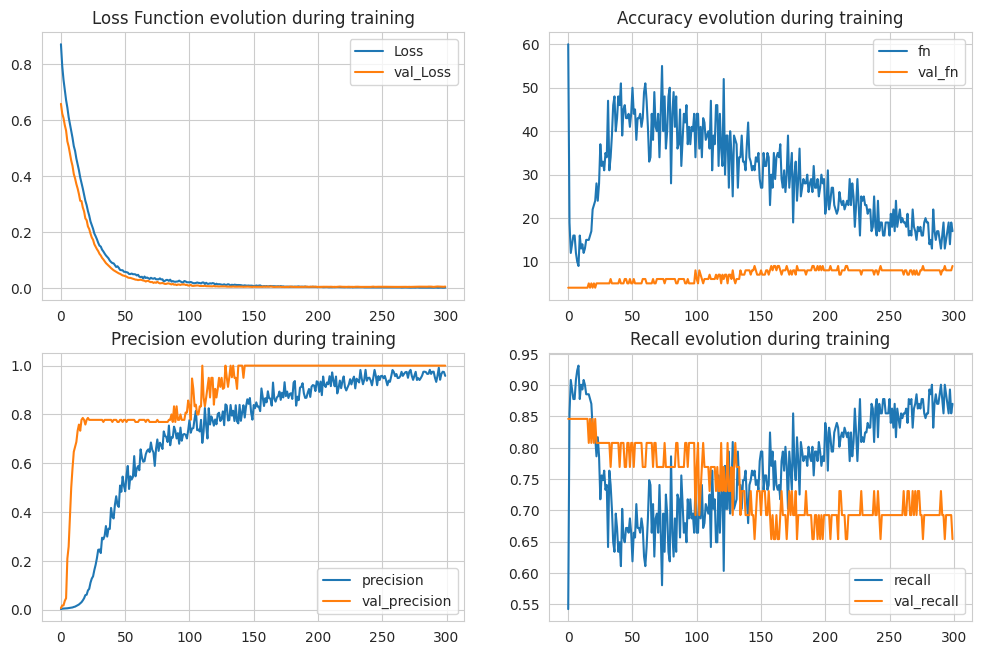

In [39]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()


In [42]:
import numpy as np

# Remove NaNs in test labels
mask_test = ~np.isnan(y_test)
y_test_clean = y_test[mask_test]
y_test_pred_clean = y_test_pred[mask_test]


In [44]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test_clean, y_test_pred_clean.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test_clean, y_test_pred_clean.round()),
    },
}

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
967/967 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Train Result:
Accuracy Score: 99.98%
_______________________________________________
Classification Report:
               0.0    1.0  accuracy  macro avg  weighted avg
precision     1.00   0.99      1.00       1.00          1.00
recall        1.00   0.92      1.00       0.96          1.00
f1-score      1.00   0.96      1.00       0.98          1.00
support   57597.00 131.00      1.00   57728.00      57728.00
_______________________________________________
Confusion Matrix: 
 [[57596     1]
 [   10   121]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
               0.0   1.0  accuracy  macro avg  weighted avg
precision     1.00  0.97      1.00       0.98          1.00
recall        1.00  0.76      1.00       0.88          1.00
f1-score      1.00  0.85      1.00       0.93          1.00
support   30851.00 75.00      1.00   30926.00      30926

# XGBoost

In [48]:

print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

print("Infs in y_train:", np.isinf(y_train).sum())
print("Infs in y_test:", np.isinf(y_test).sum())

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


NaNs in y_train: 0
NaNs in y_test: 1
Infs in y_train: 0
Infs in y_test: 0
Unique values in y_train: [0. 1.]
Unique values in y_test: [ 0.  1. nan]


In [49]:
# Remove invalid rows from train set
mask_train = ~np.isnan(y_train) & ~np.isinf(y_train)
X_train_clean = X_train[mask_train]
y_train_clean = y_train[mask_train]

# Remove invalid rows from test set
mask_test = ~np.isnan(y_test) & ~np.isinf(y_test)
X_test_clean = X_test[mask_test]
y_test_clean = y_test[mask_test]


In [50]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='aucpr')

xgb_clf.fit(X_train_clean, y_train_clean,
            eval_set=[(X_train_clean, y_train_clean),
                      (X_test_clean, y_test_clean)],
            verbose=True)

y_train_pred = xgb_clf.predict(X_train_clean)
y_test_pred  = xgb_clf.predict(X_test_clean)

print_score(y_train_clean, y_train_pred, train=True)
print_score(y_test_clean, y_test_pred, train=False)

scores_dict['XGBoost'] = {
    'Train': f1_score(y_train_clean, y_train_pred),
    'Test': f1_score(y_test_clean, y_test_pred),
}



[0]	validation_0-aucpr:0.23706	validation_1-aucpr:0.18434
[1]	validation_0-aucpr:0.00354	validation_1-aucpr:0.00231
[2]	validation_0-aucpr:0.00265	validation_1-aucpr:0.00322
[3]	validation_0-aucpr:0.01011	validation_1-aucpr:0.00200
[4]	validation_0-aucpr:0.00139	validation_1-aucpr:0.00134
[5]	validation_0-aucpr:0.01233	validation_1-aucpr:0.00149
[6]	validation_0-aucpr:0.00255	validation_1-aucpr:0.00135
[7]	validation_0-aucpr:0.01890	validation_1-aucpr:0.00152
[8]	validation_0-aucpr:0.00130	validation_1-aucpr:0.00136
[9]	validation_0-aucpr:0.03665	validation_1-aucpr:0.00144
[10]	validation_0-aucpr:0.00142	validation_1-aucpr:0.00139
[11]	validation_0-aucpr:0.04398	validation_1-aucpr:0.00158
[12]	validation_0-aucpr:0.00909	validation_1-aucpr:0.00142
[13]	validation_0-aucpr:0.04734	validation_1-aucpr:0.00160
[14]	validation_0-aucpr:0.00206	validation_1-aucpr:0.00152
[15]	validation_0-aucpr:0.04503	validation_1-aucpr:0.00196
[16]	validation_0-aucpr:0.00904	validation_1-aucpr:0.00159
[17]	va

# Random Forest

# CatBoost

In [53]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [54]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.058216
0:	learn: 0.4993829	total: 92.7ms	remaining: 1m 32s
1:	learn: 0.3673852	total: 185ms	remaining: 1m 32s
2:	learn: 0.2712915	total: 287ms	remaining: 1m 35s
3:	learn: 0.1938793	total: 371ms	remaining: 1m 32s
4:	learn: 0.1394707	total: 415ms	remaining: 1m 22s
5:	learn: 0.1005197	total: 454ms	remaining: 1m 15s
6:	learn: 0.0746676	total: 534ms	remaining: 1m 15s
7:	learn: 0.0551411	total: 605ms	remaining: 1m 14s
8:	learn: 0.0411833	total: 668ms	remaining: 1m 13s
9:	learn: 0.0316379	total: 727ms	remaining: 1m 11s
10:	learn: 0.0252506	total: 789ms	remaining: 1m 10s
11:	learn: 0.0195303	total: 815ms	remaining: 1m 7s
12:	learn: 0.0156908	total: 844ms	remaining: 1m 4s
13:	learn: 0.0128003	total: 869ms	remaining: 1m 1s
14:	learn: 0.0107354	total: 894ms	remaining: 58.7s
15:	learn: 0.0090612	total: 919ms	remaining: 56.5s
16:	learn: 0.0077435	total: 946ms	remaining: 54.7s
17:	learn: 0.0067451	total: 972ms	remaining: 53s
18:	learn: 0.0059437	total: 1.01s	remaining: 52.1s
1

In [56]:


# Mask out NaN values in y_test
mask_test = ~np.isnan(y_test)
y_test_clean = y_test[mask_test]
y_test_pred_clean = y_test_pred[mask_test]


mask_train = ~np.isnan(y_train)
y_train_clean = y_train[mask_train]
y_train_pred_clean = y_train_pred[mask_train]


print_score(y_train_clean, y_train_pred_clean, train=True)
print_score(y_test_clean, y_test_pred_clean, train=False)

scores_dict['CatBoost'] = {
    'Train': f1_score(y_train_clean, y_train_pred_clean),
    'Test': f1_score(y_test_clean, y_test_pred_clean),
}


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
               0.0    1.0  accuracy  macro avg  weighted avg
precision     1.00   1.00      1.00       1.00          1.00
recall        1.00   1.00      1.00       1.00          1.00
f1-score      1.00   1.00      1.00       1.00          1.00
support   57597.00 131.00      1.00   57728.00      57728.00
_______________________________________________
Confusion Matrix: 
 [[57597     0]
 [    0   131]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
               0.0   1.0  accuracy  macro avg  weighted avg
precision     1.00  0.98      1.00       0.99          1.00
recall        1.00  0.80      1.00       0.90          1.00
f1-score      1.00  0.88      1.00       0.94          1.00
support   30851.00 75.00      1.00   30926.00      30926.00
_______________________________________________
Confusion Matrix: 
 [[30850    

# LigthGBM

In [58]:


# Clean y_train
mask_train = ~np.isnan(y_train)
y_train_clean = y_train[mask_train]
y_train_pred_clean = y_train_pred[mask_train]

# Clean y_test
mask_test = ~np.isnan(y_test)
y_test_clean = y_test[mask_test]
y_test_pred_clean = y_test_pred[mask_test]

# Now evaluate
print_score(y_train_clean, y_train_pred_clean, train=True)
print_score(y_test_clean, y_test_pred_clean, train=False)

scores_dict['LightGBM'] = {
    'Train': f1_score(y_train_clean, y_train_pred_clean),
    'Test': f1_score(y_test_clean, y_test_pred_clean),
}


Train Result:
Accuracy Score: 99.72%
_______________________________________________
Classification Report:
               0.0    1.0  accuracy  macro avg  weighted avg
precision     1.00   0.44      1.00       0.72          1.00
recall        1.00   0.89      1.00       0.94          1.00
f1-score      1.00   0.59      1.00       0.79          1.00
support   57597.00 131.00      1.00   57728.00      57728.00
_______________________________________________
Confusion Matrix: 
 [[57450   147]
 [   15   116]]

Test Result:
Accuracy Score: 99.52%
_______________________________________________
Classification Report:
               0.0   1.0  accuracy  macro avg  weighted avg
precision     1.00  0.30      1.00       0.65          1.00
recall        1.00  0.72      1.00       0.86          1.00
f1-score      1.00  0.42      1.00       0.71          1.00
support   30851.00 75.00      1.00   30926.00      30926.00
_______________________________________________
Confusion Matrix: 
 [[30724   12

# Model Comparaison

<Axes: >

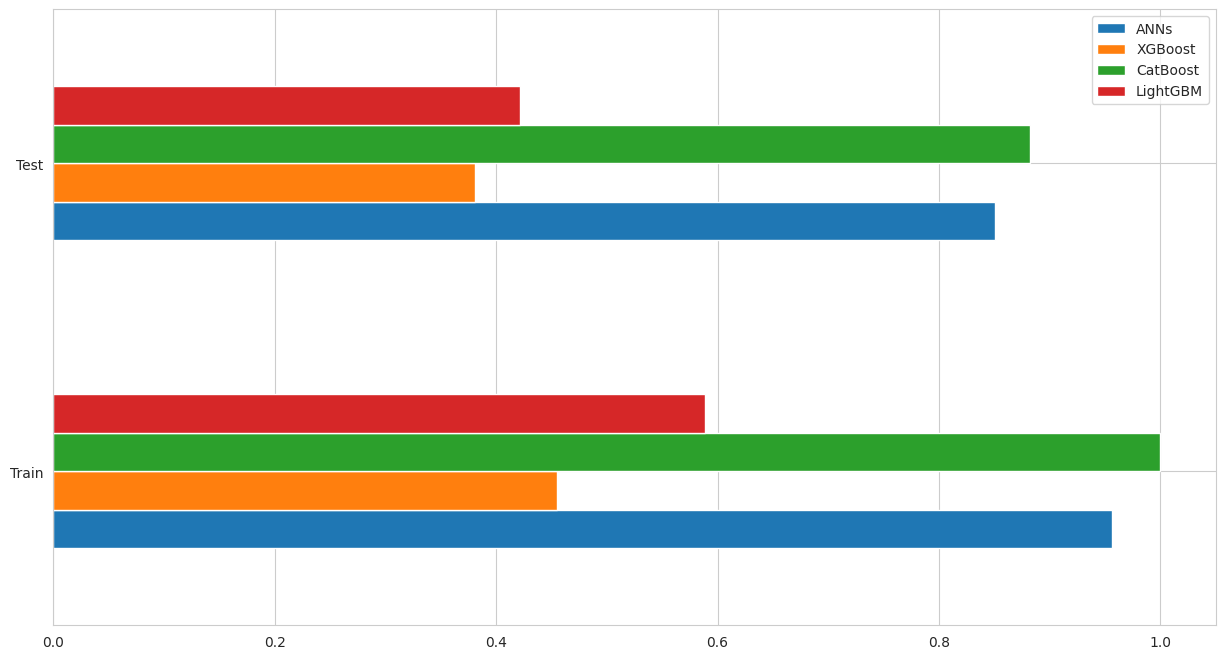

In [59]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))